In [100]:
from pd_func import *

pd.set_option("display.max_rows()",100)
pd.set_option("display.max_columns()",100)

In [2]:
data=pd.read_pickle("data_run.pickle")

In [3]:
data

,vid,status,c_stat,speed,mileage,t_volt,t_current,soc,max_cell_volt,min_cell_volt,max_temp,min_temp,time,run_frag
0,1,1.0,3.0,0.0,8130.000000,363.899994,3.500000,94.0,4.066,4.025,5.0,4.0,2018-01-08 18:59:59,1
1,1,1.0,3.0,6.7,8130.000000,363.899994,1.600000,94.0,4.061,4.021,5.0,4.0,2018-01-08 19:00:09,1
2,1,1.0,3.0,2.3,8130.000000,363.700012,4.500000,94.0,4.062,4.023,5.0,4.0,2018-01-08 19:00:19,1
3,1,1.0,3.0,0.0,8130.000000,363.899994,2.000000,94.0,4.062,4.023,5.0,4.0,2018-01-08 19:00:29,1
4,1,1.0,3.0,13.0,8130.000000,363.799988,1.500000,94.0,4.061,4.021,5.0,4.0,2018-01-08 19:00:39,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14116116,10,1.0,3.0,8.6,28975.000000,365.600006,15.800000,54.0,3.738,3.718,27.0,25.0,2020-03-18 17:34:36,5931
14116117,10,1.0,3.0,22.1,28975.099609,365.399994,17.700001,54.0,3.735,3.715,27.0,25.0,2020-03-18 17:34:46,5931
14116118,10,1.0,3.0,12.6,28975.099609,366.200012,1.500000,54.0,3.743,3.724,27.0,25.0,2020-03-18 17:34:56,5931
14116119,10,1.0,3.0,29.5,28975.199219,365.200012,15.700000,54.0,3.734,3.715,27.0,25.0,2020-03-18 17:35:06,5931


In [4]:
data["status"].value_counts()

1.0    9210086
2.0     204879
Name: status, dtype: int64

In [5]:
data["c_stat"].value_counts()

3.0    8306947
2.0    1108018
Name: c_stat, dtype: int64

In [6]:
data["vid"].value_counts()

7     5480245
2     1262760
1     1148569
4      707829
8      257855
3      150209
5      140267
6      136577
9      124296
10       6358
Name: vid, dtype: int64

# 放电片段重新计数

In [7]:
data=data.query("speed>=0.01")

value_counts=data["run_frag"].value_counts()

run_index_list=value_counts[value_counts>120].index.to_list()

data=data.loc[(data["run_frag"].isin(run_index_list))]

In [8]:
data

,vid,status,c_stat,speed,mileage,t_volt,t_current,soc,max_cell_volt,min_cell_volt,max_temp,min_temp,time,run_frag
1,1,1.0,3.0,6.7,8130.000000,363.899994,1.6,94.0,4.061,4.021,5.0,4.0,2018-01-08 19:00:09,1
2,1,1.0,3.0,2.3,8130.000000,363.700012,4.5,94.0,4.062,4.023,5.0,4.0,2018-01-08 19:00:19,1
4,1,1.0,3.0,13.0,8130.000000,363.799988,1.5,94.0,4.061,4.021,5.0,4.0,2018-01-08 19:00:39,1
20,1,1.0,3.0,2.0,8130.000000,363.500000,4.0,94.0,4.060,4.015,5.0,4.0,2018-01-08 19:03:13,1
21,1,1.0,3.0,7.8,8130.000000,363.600006,2.6,94.0,4.061,4.018,5.0,4.0,2018-01-08 19:03:23,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14115936,10,1.0,3.0,17.6,28967.500000,367.799988,1.3,55.0,3.760,3.737,27.0,25.0,2020-03-18 16:40:12,5930
14115940,10,1.0,2.0,23.6,28967.599609,367.799988,-2.2,55.0,3.758,3.735,27.0,25.0,2020-03-18 16:40:52,5930
14115941,10,1.0,2.0,13.3,28967.599609,368.100006,-3.8,55.0,3.763,3.740,27.0,25.0,2020-03-18 16:41:02,5930
14115942,10,1.0,3.0,2.5,28967.699219,367.799988,2.2,55.0,3.760,3.736,27.0,25.0,2020-03-18 16:41:12,5930


In [9]:
vid_Trans(data,'run_frag')

In [10]:
data

,vid,status,c_stat,speed,mileage,t_volt,t_current,soc,max_cell_volt,min_cell_volt,max_temp,min_temp,time,run_frag
1,1,1.0,3.0,6.7,8130.000000,363.899994,1.6,94.0,4.061,4.021,5.0,4.0,2018-01-08 19:00:09,1
2,1,1.0,3.0,2.3,8130.000000,363.700012,4.5,94.0,4.062,4.023,5.0,4.0,2018-01-08 19:00:19,1
4,1,1.0,3.0,13.0,8130.000000,363.799988,1.5,94.0,4.061,4.021,5.0,4.0,2018-01-08 19:00:39,1
20,1,1.0,3.0,2.0,8130.000000,363.500000,4.0,94.0,4.060,4.015,5.0,4.0,2018-01-08 19:03:13,1
21,1,1.0,3.0,7.8,8130.000000,363.600006,2.6,94.0,4.061,4.018,5.0,4.0,2018-01-08 19:03:23,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14115936,10,1.0,3.0,17.6,28967.500000,367.799988,1.3,55.0,3.760,3.737,27.0,25.0,2020-03-18 16:40:12,3314
14115940,10,1.0,2.0,23.6,28967.599609,367.799988,-2.2,55.0,3.758,3.735,27.0,25.0,2020-03-18 16:40:52,3314
14115941,10,1.0,2.0,13.3,28967.599609,368.100006,-3.8,55.0,3.763,3.740,27.0,25.0,2020-03-18 16:41:02,3314
14115942,10,1.0,3.0,2.5,28967.699219,367.799988,2.2,55.0,3.760,3.736,27.0,25.0,2020-03-18 16:41:12,3314


# 时间间隔

In [11]:
pd.set_option("display.max_rows()",10)

In [12]:
#采样频率（计数）
for frag in range(1,528):
    data_frag=data[data["run_frag"]==frag]
    data_frag.reset_index(drop=True,inplace=True)
    data_frag["time_diff"]=data_frag["time"].diff()
    print("frag:",frag)
    print(data_frag["time_diff"].value_counts())
    print("*"*90)

frag: 1
0 days 00:00:10    352
0 days 00:00:20     18
0 days 00:00:01      8
0 days 00:00:30      7
0 days 00:01:00      5
                  ... 
0 days 00:10:16      1
0 days 00:00:16      1
0 days 00:02:34      1
0 days 00:01:30      1
0 days 00:13:04      1
Name: time_diff, Length: 26, dtype: int64
******************************************************************************************
frag: 2
0 days 00:00:10    650
0 days 00:00:20     23
0 days 00:00:30      9
0 days 00:00:40      6
0 days 00:01:10      5
                  ... 
0 days 00:04:30      1
0 days 00:04:00      1
0 days 00:02:20      1
0 days 00:02:10      1
0 days 00:02:50      1
Name: time_diff, Length: 24, dtype: int64
******************************************************************************************
frag: 3
0 days 00:00:10    1020
0 days 00:00:20      27
0 days 00:00:30      17
0 days 00:00:40      13
0 days 00:00:50      11
                   ... 
0 days 00:22:21       1
0 days 00:22:05       1
0 days 00:05

frag: 40
0 days 00:00:10    289
0 days 00:00:20      9
0 days 00:00:30      6
0 days 00:00:40      6
0 days 00:00:50      1
                  ... 
0 days 00:01:50      1
0 days 00:02:00      1
0 days 00:02:30      1
0 days 00:02:50      1
0 days 00:05:00      1
Name: time_diff, Length: 12, dtype: int64
******************************************************************************************
frag: 41
0 days 00:00:10    489
0 days 00:00:20     14
0 days 00:00:30     11
0 days 00:01:00      6
0 days 00:01:30      6
                  ... 
0 days 00:00:09      1
0 days 00:01:55      1
0 days 00:04:27      1
0 days 00:28:19      1
0 days 00:32:05      1
Name: time_diff, Length: 26, dtype: int64
******************************************************************************************
frag: 42
0 days 00:00:10    708
0 days 00:00:20     22
0 days 00:00:30     13
0 days 00:00:40      7
0 days 00:01:20      5
                  ... 
0 days 00:02:20      1
0 days 00:00:50      1
0 days 00:01:01  

frag: 61
0 days 00:00:10    1026
0 days 00:00:20      48
0 days 00:00:30      33
0 days 00:00:40      18
0 days 00:01:10      17
                   ... 
0 days 00:04:40       1
0 days 00:04:00       1
0 days 00:02:40       1
0 days 00:02:20       1
0 days 00:33:23       1
Name: time_diff, Length: 40, dtype: int64
******************************************************************************************
frag: 62
0 days 00:00:10    1612
0 days 00:00:20      72
0 days 00:00:30      38
0 days 00:00:50      28
0 days 00:01:00      17
                   ... 
0 days 00:06:20       1
0 days 00:01:22       1
0 days 00:00:34       1
0 days 00:10:40       1
0 days 00:14:41       1
Name: time_diff, Length: 42, dtype: int64
******************************************************************************************
frag: 63
0 days 00:00:10    673
0 days 00:00:20     36
0 days 00:00:40     18
0 days 00:00:30     16
0 days 00:00:50      6
                  ... 
0 days 00:07:00      1
0 days 00:01:22   

frag: 99
0 days 00:00:10    159
0 days 00:00:20    105
0 days 00:00:30     87
0 days 00:00:40     42
0 days 00:00:50     36
                  ... 
0 days 00:05:20      1
0 days 00:04:10      1
0 days 00:03:30      1
0 days 00:03:20      1
0 days 00:00:17      1
Name: time_diff, Length: 35, dtype: int64
******************************************************************************************
frag: 100
0 days 00:00:10    858
0 days 00:00:20     44
0 days 00:00:30     26
0 days 00:00:40     16
0 days 00:00:50      9
                  ... 
0 days 00:02:40      1
0 days 00:02:20      1
0 days 00:02:00      1
0 days 00:01:50      1
0 days 00:00:03      1
Name: time_diff, Length: 30, dtype: int64
******************************************************************************************
frag: 101
0 days 00:00:10    812
0 days 00:00:20     38
0 days 00:00:40     22
0 days 00:00:30     19
0 days 00:01:00     16
                  ... 
0 days 00:04:30      1
0 days 00:04:10      1
0 days 00:03:30

Name: time_diff, Length: 54, dtype: int64
******************************************************************************************
frag: 136
0 days 00:00:10    729
0 days 00:00:20     58
0 days 00:00:30     37
0 days 00:00:40     17
0 days 00:00:50     10
                  ... 
0 days 00:54:14      1
0 days 00:28:06      1
0 days 00:03:00      1
0 days 00:01:50      1
0 days 02:23:38      1
Name: time_diff, Length: 28, dtype: int64
******************************************************************************************
frag: 137
0 days 00:00:10    447
0 days 00:00:20    178
0 days 00:00:30     69
0 days 00:00:40     26
0 days 00:00:50     25
                  ... 
0 days 00:04:20      1
0 days 00:04:10      1
0 days 00:03:00      1
0 days 00:02:00      1
0 days 00:00:03      1
Name: time_diff, Length: 34, dtype: int64
******************************************************************************************
frag: 138
0 days 00:00:10    892
0 days 00:00:20     59
0 days 00:00:30    

0 days 00:00:20    27
0 days 00:00:10    27
0 days 00:00:30    16
0 days 00:01:00    15
0 days 00:00:40    12
                   ..
0 days 00:02:50     1
0 days 00:02:10     1
0 days 00:01:54     1
0 days 00:00:26     1
0 days 00:00:12     1
Name: time_diff, Length: 40, dtype: int64
******************************************************************************************
frag: 173
0 days 00:00:10    42
0 days 00:00:30    23
0 days 00:00:50    15
0 days 00:00:20    15
0 days 00:00:40    13
                   ..
0 days 00:03:31     1
0 days 00:03:21     1
0 days 00:02:46     1
0 days 00:01:26     1
0 days 00:04:10     1
Name: time_diff, Length: 52, dtype: int64
******************************************************************************************
frag: 174
0 days 00:00:10    35
0 days 00:00:20    30
0 days 00:00:30    25
0 days 00:00:40    16
0 days 00:01:20    11
                   ..
0 days 00:04:00     1
0 days 00:01:40     1
0 days 00:00:57     1
0 days 00:03:20     1
0 days 00:

Name: time_diff, Length: 41, dtype: int64
******************************************************************************************
frag: 209
0 days 00:00:10    336
0 days 00:00:20    126
0 days 00:00:30     51
0 days 00:00:50     17
0 days 00:00:40     15
                  ... 
0 days 00:03:17      1
0 days 09:55:17      1
0 days 00:07:10      1
0 days 00:00:02      1
0 days 00:00:03      1
Name: time_diff, Length: 31, dtype: int64
******************************************************************************************
frag: 210
0 days 00:00:10    811
0 days 00:00:20    134
0 days 00:00:30     44
0 days 00:00:40     24
0 days 00:00:50     10
                  ... 
0 days 00:00:02      1
0 days 01:13:41      1
0 days 00:54:21      1
0 days 00:00:21      1
0 days 00:30:03      1
Name: time_diff, Length: 45, dtype: int64
******************************************************************************************
frag: 211
0 days 00:00:10    533
0 days 00:00:20    184
0 days 00:00:30    

0 days 00:00:10    325
0 days 00:00:20    129
0 days 00:00:30     61
0 days 00:00:40     35
0 days 00:00:50     21
                  ... 
0 days 00:55:50      1
0 days 00:00:19      1
0 days 00:00:27      1
0 days 00:00:43      1
0 days 00:00:02      1
Name: time_diff, Length: 28, dtype: int64
******************************************************************************************
frag: 249
0 days 00:00:10    278
0 days 00:00:20     96
0 days 00:00:30     55
0 days 00:00:40     32
0 days 00:00:50     16
                  ... 
0 days 00:00:39      1
0 days 00:00:13      1
0 days 00:48:02      1
0 days 00:03:10      1
0 days 00:00:14      1
Name: time_diff, Length: 36, dtype: int64
******************************************************************************************
frag: 250
0 days 00:00:10    124
0 days 00:00:20     44
0 days 00:00:30     24
0 days 00:00:40      9
0 days 00:00:50      8
                  ... 
0 days 00:02:30      1
0 days 00:02:20      1
0 days 00:02:01      1
0

frag: 284
0 days 00:00:10    914
0 days 00:00:20     34
0 days 00:00:30     23
0 days 00:00:40     16
0 days 00:01:00     11
                  ... 
0 days 00:02:10      1
0 days 00:03:10      1
0 days 00:09:50      1
0 days 00:00:07      1
0 days 00:00:04      1
Name: time_diff, Length: 29, dtype: int64
******************************************************************************************
frag: 285
0 days 00:00:10    1616
0 days 00:00:20      74
0 days 00:00:30      43
0 days 00:00:50      21
0 days 00:00:40      19
                   ... 
0 days 00:01:21       1
0 days 00:03:20       1
0 days 00:07:37       1
0 days 00:51:33       1
0 days 00:03:00       1
Name: time_diff, Length: 39, dtype: int64
******************************************************************************************
frag: 286
0 days 00:00:10    1695
0 days 00:00:20      68
0 days 00:00:30      32
0 days 00:00:40      26
0 days 00:00:50      24
                   ... 
0 days 00:00:39       1
0 days 00:06:35    

frag: 317
0 days 00:00:10    778
0 days 00:00:20     31
0 days 00:00:30     17
0 days 00:00:50      9
0 days 00:01:00      9
                  ... 
0 days 00:01:30      1
0 days 00:00:07      1
0 days 00:00:09      1
0 days 00:01:06      1
0 days 00:00:03      1
Name: time_diff, Length: 26, dtype: int64
******************************************************************************************
frag: 318
0 days 00:00:10    2203
0 days 00:00:20     156
0 days 00:00:30      83
0 days 00:00:40      49
0 days 00:00:50      31
                   ... 
0 days 00:48:01       1
0 days 00:00:09       1
0 days 02:13:46       1
0 days 00:00:12       1
0 days 00:02:51       1
Name: time_diff, Length: 44, dtype: int64
******************************************************************************************
frag: 319
0 days 00:00:10    503
0 days 00:00:30     21
0 days 00:00:20     21
0 days 00:00:40      9
0 days 00:00:50      9
                  ... 
0 days 01:02:30      1
0 days 00:00:07      1
0 d

Name: time_diff, Length: 22, dtype: int64
******************************************************************************************
frag: 355
0 days 00:00:10    2110
0 days 00:00:20      87
0 days 00:00:30      42
0 days 00:00:50      33
0 days 00:00:40      28
                   ... 
0 days 00:58:40       1
0 days 00:01:27       1
0 days 02:35:12       1
0 days 00:06:10       1
0 days 00:00:08       1
Name: time_diff, Length: 46, dtype: int64
******************************************************************************************
frag: 356
0 days 00:00:10    1154
0 days 00:00:20      63
0 days 00:00:30      38
0 days 00:01:00      22
0 days 00:01:10      15
                   ... 
0 days 00:04:00       1
0 days 00:03:40       1
0 days 00:03:00       1
0 days 00:02:40       1
0 days 00:00:03       1
Name: time_diff, Length: 37, dtype: int64
******************************************************************************************
frag: 357
0 days 00:00:10    1412
0 days 00:00:20    

Name: time_diff, Length: 33, dtype: int64
******************************************************************************************
frag: 393
0 days 00:00:10    1181
0 days 00:00:20      39
0 days 00:00:30      31
0 days 00:00:40      16
0 days 00:00:50      15
                   ... 
0 days 00:00:04       2
0 days 00:03:30       1
0 days 06:51:55       1
0 days 00:14:00       1
0 days 00:00:19       1
Name: time_diff, Length: 26, dtype: int64
******************************************************************************************
frag: 394
0 days 00:00:10    1579
0 days 00:00:20      56
0 days 00:00:40      27
0 days 00:00:30      26
0 days 00:00:50      21
                   ... 
0 days 00:08:30       1
0 days 00:00:24       1
0 days 00:04:00       1
0 days 00:00:04       1
0 days 00:00:29       1
Name: time_diff, Length: 33, dtype: int64
******************************************************************************************
frag: 395
0 days 00:00:10    635
0 days 00:00:30     

frag: 427
0 days 00:00:10    159
0 days 00:00:20     75
0 days 00:00:30     20
0 days 00:00:50      7
0 days 00:01:00      6
                  ... 
0 days 00:00:19      1
0 days 00:02:30      1
0 days 00:01:06      1
0 days 00:01:58      1
0 days 00:02:40      1
Name: time_diff, Length: 32, dtype: int64
******************************************************************************************
frag: 428
0 days 00:00:10    302
0 days 00:00:01     11
0 days 00:00:20      3
0 days 00:00:02      3
0 days 00:00:08      3
                  ... 
0 days 00:04:30      1
0 days 00:02:10      1
0 days 00:01:20      1
0 days 00:34:23      1
0 days 00:00:40      1
Name: time_diff, Length: 18, dtype: int64
******************************************************************************************
frag: 429
0 days 00:00:10    742
0 days 00:00:20     10
0 days 00:00:30      9
0 days 00:00:02      7
0 days 00:01:20      6
                  ... 
0 days 00:02:40      1
0 days 00:02:10      1
0 days 00:01:5

Name: time_diff, Length: 12, dtype: int64
******************************************************************************************
frag: 462
0 days 00:00:10    563
0 days 00:00:20     19
0 days 00:00:01     14
0 days 00:00:30     11
0 days 00:00:40      8
                  ... 
0 days 00:00:05      2
0 days 00:03:20      1
0 days 00:00:07      1
0 days 00:00:18      1
0 days 00:02:50      1
Name: time_diff, Length: 23, dtype: int64
******************************************************************************************
frag: 463
0 days 00:00:10    823
0 days 00:00:20     28
0 days 00:00:30     16
0 days 00:00:50     11
0 days 00:00:40     10
                  ... 
0 days 00:02:50      1
0 days 00:00:37      1
0 days 00:09:53      1
0 days 00:20:33      1
0 days 00:02:30      1
Name: time_diff, Length: 27, dtype: int64
******************************************************************************************
frag: 464
0 days 00:00:10    1361
0 days 00:00:20      62
0 days 00:00:30  

Name: time_diff, Length: 22, dtype: int64
******************************************************************************************
frag: 499
0 days 00:00:10    632
0 days 00:00:20     24
0 days 00:00:30     21
0 days 00:00:01     11
0 days 00:00:40      8
                  ... 
0 days 00:02:20      1
0 days 00:00:08      1
0 days 00:00:11      1
0 days 00:04:21      1
0 days 00:02:40      1
Name: time_diff, Length: 26, dtype: int64
******************************************************************************************
frag: 500
0 days 00:00:10    516
0 days 00:00:20     13
0 days 00:00:02     12
0 days 00:00:01     12
0 days 00:00:30     10
                  ... 
0 days 00:01:30      1
0 days 01:39:49      1
0 days 00:02:10      1
0 days 00:02:00      1
0 days 00:02:44      1
Name: time_diff, Length: 26, dtype: int64
******************************************************************************************
frag: 501
0 days 00:00:10    1250
0 days 00:00:20      62
0 days 00:00:30  

In [13]:
#采样频率（频率）
for frag in range(1,528):
    data_frag=data[data["run_frag"]==frag]
    data_frag.reset_index(drop=True,inplace=True)
    data_frag["time_diff"]=data_frag["time"].diff()
    print("frag:",frag)
    print(data_frag["time_diff"].value_counts(normalize=True).apply(lambda x:x*100))
    print("*"*90)

frag: 1
0 days 00:00:10    83.610451
0 days 00:00:20     4.275534
0 days 00:00:01     1.900238
0 days 00:00:30     1.662708
0 days 00:01:00     1.187648
                     ...    
0 days 00:10:16     0.237530
0 days 00:00:16     0.237530
0 days 00:02:34     0.237530
0 days 00:01:30     0.237530
0 days 00:13:04     0.237530
Name: time_diff, Length: 26, dtype: float64
******************************************************************************************
frag: 2
0 days 00:00:10    90.277778
0 days 00:00:20     3.194444
0 days 00:00:30     1.250000
0 days 00:00:40     0.833333
0 days 00:01:10     0.694444
                     ...    
0 days 00:04:30     0.138889
0 days 00:04:00     0.138889
0 days 00:02:20     0.138889
0 days 00:02:10     0.138889
0 days 00:02:50     0.138889
Name: time_diff, Length: 24, dtype: float64
******************************************************************************************
frag: 3
0 days 00:00:10    89.709763
0 days 00:00:20     2.374670
0 days 00:

Name: time_diff, Length: 37, dtype: float64
******************************************************************************************
frag: 32
0 days 00:00:10    84.827586
0 days 00:00:50     1.724138
0 days 00:00:20     1.724138
0 days 00:00:30     1.379310
0 days 00:01:00     1.379310
                     ...    
0 days 00:19:40     0.344828
0 days 00:12:54     0.344828
0 days 00:00:45     0.344828
0 days 00:01:30     0.344828
0 days 00:00:02     0.344828
Name: time_diff, Length: 23, dtype: float64
******************************************************************************************
frag: 33
0 days 00:00:10    79.487179
0 days 00:00:30     4.102564
0 days 00:00:20     3.589744
0 days 00:00:50     3.076923
0 days 00:00:40     2.564103
                     ...    
0 days 00:01:36     0.512821
0 days 00:01:10     0.512821
0 days 00:00:45     0.512821
0 days 00:00:42     0.512821
0 days 00:30:22     0.512821
Name: time_diff, Length: 18, dtype: float64
******************************

0 days 00:00:10    73.863636
0 days 00:00:20     3.551136
0 days 00:00:30     1.988636
0 days 00:00:50     1.704545
0 days 00:00:01     1.420455
                     ...    
0 days 00:21:10     0.142045
0 days 00:21:40     0.142045
0 days 00:25:50     0.142045
0 days 00:26:40     0.142045
0 days 00:12:40     0.142045
Name: time_diff, Length: 68, dtype: float64
******************************************************************************************
frag: 66
0 days 00:00:10    39.138943
0 days 00:00:20    10.958904
0 days 00:00:30     9.197652
0 days 00:00:50     5.283757
0 days 00:00:40     4.500978
                     ...    
0 days 00:10:00     0.195695
0 days 00:14:00     0.195695
0 days 00:15:57     0.195695
0 days 00:16:10     0.195695
0 days 00:02:41     0.195695
Name: time_diff, Length: 69, dtype: float64
******************************************************************************************
frag: 67
0 days 00:00:10    46.845638
0 days 00:00:20    15.704698
0 days 00:00:30 

Name: time_diff, Length: 33, dtype: float64
******************************************************************************************
frag: 84
0 days 00:00:10    74.269006
0 days 00:00:20     6.042885
0 days 00:00:30     4.483431
0 days 00:00:40     3.703704
0 days 00:01:00     1.754386
                     ...    
0 days 00:00:07     0.194932
0 days 00:02:00     0.194932
0 days 00:00:11     0.194932
0 days 00:03:19     0.194932
0 days 00:00:04     0.194932
Name: time_diff, Length: 25, dtype: float64
******************************************************************************************
frag: 85
0 days 00:00:10    69.212691
0 days 00:00:20     3.819036
0 days 00:00:30     2.996475
0 days 00:00:02     2.291422
0 days 00:00:03     2.115159
                     ...    
0 days 00:00:17     0.058754
0 days 00:01:32     0.058754
0 days 00:00:18     0.058754
0 days 00:00:58     0.058754
0 days 00:01:26     0.058754
Name: time_diff, Length: 66, dtype: float64
******************************

Name: time_diff, Length: 30, dtype: float64
******************************************************************************************
frag: 103
0 days 00:00:10    90.051020
0 days 00:00:20     2.168367
0 days 00:00:30     2.040816
0 days 00:00:40     1.020408
0 days 00:01:20     0.892857
                     ...    
0 days 00:03:50     0.127551
0 days 00:03:40     0.127551
0 days 00:02:00     0.127551
0 days 00:01:00     0.127551
0 days 00:00:03     0.127551
Name: time_diff, Length: 19, dtype: float64
******************************************************************************************
frag: 104
0 days 00:00:10    82.520325
0 days 00:00:20     3.150407
0 days 00:00:30     2.947154
0 days 00:00:50     1.422764
0 days 00:00:40     1.219512
                     ...    
0 days 00:00:23     0.101626
0 days 00:00:31     0.101626
0 days 00:04:45     0.101626
0 days 00:02:00     0.101626
0 days 00:02:50     0.101626
Name: time_diff, Length: 33, dtype: float64
****************************

Name: time_diff, Length: 54, dtype: float64
******************************************************************************************
frag: 136
0 days 00:00:10    79.759300
0 days 00:00:20     6.345733
0 days 00:00:30     4.048140
0 days 00:00:40     1.859956
0 days 00:00:50     1.094092
                     ...    
0 days 00:54:14     0.109409
0 days 00:28:06     0.109409
0 days 00:03:00     0.109409
0 days 00:01:50     0.109409
0 days 02:23:38     0.109409
Name: time_diff, Length: 28, dtype: float64
******************************************************************************************
frag: 137
0 days 00:00:10    53.087886
0 days 00:00:20    21.140143
0 days 00:00:30     8.194774
0 days 00:00:40     3.087886
0 days 00:00:50     2.969121
                     ...    
0 days 00:04:20     0.118765
0 days 00:04:10     0.118765
0 days 00:03:00     0.118765
0 days 00:02:00     0.118765
0 days 00:00:03     0.118765
Name: time_diff, Length: 34, dtype: float64
****************************

0 days 00:00:10    71.706865
0 days 00:00:20     8.348794
0 days 00:00:30     3.061224
0 days 00:00:40     1.669759
0 days 00:01:00     1.484230
                     ...    
0 days 00:03:00     0.092764
0 days 00:06:20     0.092764
0 days 00:03:30     0.092764
0 days 00:03:50     0.092764
0 days 00:00:12     0.092764
Name: time_diff, Length: 64, dtype: float64
******************************************************************************************
frag: 171
0 days 00:00:10    90.016639
0 days 00:00:20     3.161398
0 days 00:00:30     1.830283
0 days 00:00:50     0.942873
0 days 00:00:40     0.831947
                     ...    
0 days 00:10:20     0.055463
0 days 00:03:20     0.055463
0 days 00:02:20     0.055463
0 days 00:02:00     0.055463
0 days 00:00:04     0.055463
Name: time_diff, Length: 28, dtype: float64
******************************************************************************************
frag: 172
0 days 00:00:20    14.210526
0 days 00:00:10    14.210526
0 days 00:00:3

Name: time_diff, Length: 27, dtype: float64
******************************************************************************************
frag: 188
0 days 00:00:10    80.209546
0 days 00:00:20     5.355064
0 days 00:00:30     2.619325
0 days 00:00:40     1.804424
0 days 00:01:00     1.629802
                     ...    
0 days 02:18:37     0.058207
0 days 00:03:40     0.058207
0 days 00:05:00     0.058207
0 days 00:26:24     0.058207
0 days 00:00:17     0.058207
Name: time_diff, Length: 42, dtype: float64
******************************************************************************************
frag: 189
0 days 00:00:10    83.027965
0 days 00:00:20     3.375121
0 days 00:00:30     2.314368
0 days 00:00:40     2.121504
0 days 00:00:50     1.253616
                     ...    
0 days 00:05:16     0.096432
0 days 00:03:20     0.096432
0 days 00:02:56     0.096432
0 days 00:01:20     0.096432
0 days 00:04:01     0.096432
Name: time_diff, Length: 31, dtype: float64
****************************

frag: 206
0 days 00:00:10    54.545455
0 days 00:00:20    17.532468
0 days 00:00:30     7.467532
0 days 00:00:40     2.597403
0 days 00:00:50     2.164502
                     ...    
0 days 00:04:20     0.108225
0 days 00:03:40     0.108225
0 days 00:03:10     0.108225
0 days 00:03:00     0.108225
0 days 00:00:03     0.108225
Name: time_diff, Length: 39, dtype: float64
******************************************************************************************
frag: 207
0 days 00:00:10    53.932584
0 days 00:00:20    21.348315
0 days 00:00:30     8.539326
0 days 00:00:40     2.247191
0 days 00:00:50     2.022472
                     ...    
0 days 00:05:11     0.224719
0 days 00:03:20     0.224719
0 days 00:03:00     0.224719
0 days 00:02:40     0.224719
0 days 00:00:03     0.224719
Name: time_diff, Length: 26, dtype: float64
******************************************************************************************
frag: 208
0 days 00:00:10    77.421875
0 days 00:00:20     8.203125
0 da

0 days 00:00:10    70.794078
0 days 00:00:20     6.191117
0 days 00:00:30     4.710633
0 days 00:00:40     3.903096
0 days 00:00:50     2.422611
                     ...    
0 days 00:03:40     0.134590
0 days 00:03:00     0.134590
0 days 00:00:49     0.134590
0 days 00:02:20     0.134590
0 days 00:00:32     0.134590
Name: time_diff, Length: 33, dtype: float64
******************************************************************************************
frag: 226
0 days 00:00:10    84.227468
0 days 00:00:20     4.721030
0 days 00:00:30     3.004292
0 days 00:00:40     1.931330
0 days 00:00:50     1.072961
                     ...    
0 days 00:03:40     0.107296
0 days 00:04:50     0.107296
0 days 00:06:30     0.107296
0 days 00:00:19     0.107296
0 days 00:00:02     0.107296
Name: time_diff, Length: 22, dtype: float64
******************************************************************************************
frag: 227
0 days 00:00:10    76.903226
0 days 00:00:20     8.129032
0 days 00:00:3

frag: 256
0 days 00:00:10    86.585366
0 days 00:00:20     3.252033
0 days 00:00:30     2.195122
0 days 00:00:50     1.463415
0 days 00:00:40     1.300813
                     ...    
0 days 00:03:10     0.081301
0 days 00:00:06     0.081301
0 days 00:00:07     0.081301
0 days 00:00:11     0.081301
0 days 00:00:04     0.081301
Name: time_diff, Length: 24, dtype: float64
******************************************************************************************
frag: 257
0 days 00:00:10    78.947368
0 days 00:00:20     6.842105
0 days 00:00:30     2.807018
0 days 00:00:40     1.842105
0 days 00:00:50     1.403509
                     ...    
0 days 00:01:17     0.043860
0 days 00:00:13     0.043860
0 days 00:01:09     0.043860
0 days 00:01:12     0.043860
0 days 01:57:50     0.043860
Name: time_diff, Length: 47, dtype: float64
******************************************************************************************
frag: 258
0 days 00:00:10    89.015544
0 days 00:00:20     3.005181
0 da

frag: 274
0 days 00:00:10    85.643564
0 days 00:00:20     2.805281
0 days 00:00:40     2.062706
0 days 00:00:30     2.062706
0 days 00:00:50     1.650165
                     ...    
0 days 00:00:12     0.082508
0 days 00:03:30     0.082508
0 days 00:01:41     0.082508
0 days 00:01:40     0.082508
0 days 00:00:04     0.082508
Name: time_diff, Length: 26, dtype: float64
******************************************************************************************
frag: 275
0 days 00:00:10    86.296900
0 days 00:00:20     3.262643
0 days 00:00:30     1.794454
0 days 00:00:40     1.386623
0 days 00:00:50     1.141925
                     ...    
0 days 00:02:50     0.081566
0 days 00:20:00     0.081566
0 days 00:06:00     0.081566
0 days 00:00:25     0.081566
0 days 00:00:03     0.081566
Name: time_diff, Length: 29, dtype: float64
******************************************************************************************
frag: 276
0 days 00:00:10    86.214324
0 days 00:00:20     2.584814
0 da

0 days 00:00:10    83.398285
0 days 00:00:20     3.975058
0 days 00:00:30     2.533125
0 days 00:00:40     1.753702
0 days 00:01:10     1.130164
                     ...    
0 days 00:01:02     0.038971
0 days 00:01:01     0.038971
0 days 00:04:00     0.038971
0 days 00:01:12     0.038971
0 days 00:00:24     0.038971
Name: time_diff, Length: 40, dtype: float64
******************************************************************************************
frag: 293
0 days 00:00:10    82.612313
0 days 00:00:20     2.995008
0 days 00:00:30     1.830283
0 days 00:00:01     1.414309
0 days 00:00:40     0.915141
                     ...    
0 days 00:03:20     0.083195
0 days 00:00:33     0.083195
0 days 00:06:40     0.083195
0 days 00:06:00     0.083195
0 days 00:00:17     0.083195
Name: time_diff, Length: 39, dtype: float64
******************************************************************************************
frag: 294
0 days 00:00:10    84.688995
0 days 00:00:20     3.561935
0 days 00:00:3

Name: time_diff, Length: 22, dtype: float64
******************************************************************************************
frag: 327
0 days 00:00:10    82.002535
0 days 00:00:20     4.372624
0 days 00:00:01     1.647655
0 days 00:00:30     1.584284
0 days 00:00:50     1.267427
                     ...    
0 days 00:07:00     0.063371
0 days 00:00:18     0.063371
0 days 00:10:20     0.063371
0 days 00:16:40     0.063371
0 days 00:02:02     0.063371
Name: time_diff, Length: 39, dtype: float64
******************************************************************************************
frag: 328
0 days 00:00:10    59.114583
0 days 00:00:20     9.635417
0 days 00:00:30     5.208333
0 days 00:00:40     4.427083
0 days 00:00:50     2.343750
                     ...    
0 days 00:02:40     0.260417
0 days 00:02:30     0.260417
0 days 00:02:10     0.260417
0 days 00:01:50     0.260417
0 days 00:00:03     0.260417
Name: time_diff, Length: 43, dtype: float64
****************************

0 days 00:00:10    85.714286
0 days 00:00:20     3.239203
0 days 00:00:30     1.827243
0 days 00:00:40     1.744186
0 days 00:00:50     1.495017
                     ...    
0 days 00:00:29     0.083056
0 days 00:04:20     0.083056
0 days 00:00:07     0.083056
0 days 00:00:28     0.083056
0 days 00:00:04     0.083056
Name: time_diff, Length: 30, dtype: float64
******************************************************************************************
frag: 360
0 days 00:00:10    79.924718
0 days 00:00:20     5.395232
0 days 00:00:30     2.383940
0 days 00:00:40     2.383940
0 days 00:00:50     1.882058
                     ...    
0 days 00:00:08     0.125471
0 days 00:00:01     0.125471
0 days 00:00:18     0.125471
0 days 00:00:54     0.125471
0 days 00:00:03     0.125471
Name: time_diff, Length: 26, dtype: float64
******************************************************************************************
frag: 361
0 days 00:00:10    82.661422
0 days 00:00:20     4.555883
0 days 00:00:3

Name: time_diff, Length: 32, dtype: float64
******************************************************************************************
frag: 377
0 days 00:00:10    84.131253
0 days 00:00:20     4.303389
0 days 00:00:40     1.936525
0 days 00:00:30     1.936525
0 days 00:00:50     1.291017
                     ...    
0 days 00:05:40     0.053792
0 days 00:00:14     0.053792
0 days 00:26:04     0.053792
0 days 00:01:01     0.053792
0 days 00:02:40     0.053792
Name: time_diff, Length: 37, dtype: float64
******************************************************************************************
frag: 378
0 days 00:00:10    81.762369
0 days 00:00:20     4.694836
0 days 00:00:30     2.564103
0 days 00:00:40     1.805706
0 days 00:00:50     1.408451
                     ...    
0 days 00:34:09     0.036114
0 days 00:00:41     0.036114
0 days 00:04:10     0.036114
0 days 00:04:40     0.036114
0 days 00:01:31     0.036114
Name: time_diff, Length: 44, dtype: float64
****************************

0 days 00:00:10    92.364170
0 days 00:00:20     1.027900
0 days 00:00:30     1.027900
0 days 00:01:10     0.587372
0 days 00:00:40     0.440529
                     ...    
0 days 00:00:06     0.146843
0 days 00:00:07     0.146843
0 days 00:09:21     0.146843
0 days 02:13:40     0.146843
0 days 00:02:30     0.146843
Name: time_diff, Length: 23, dtype: float64
******************************************************************************************
frag: 410
0 days 00:00:10    85.663717
0 days 00:00:20     3.008850
0 days 00:00:30     1.946903
0 days 00:00:40     1.238938
0 days 00:01:00     1.238938
                     ...    
0 days 00:25:40     0.176991
0 days 00:18:30     0.176991
0 days 00:02:30     0.176991
0 days 00:06:50     0.176991
0 days 00:07:20     0.176991
Name: time_diff, Length: 28, dtype: float64
******************************************************************************************
frag: 411
0 days 00:00:10    87.000000
0 days 00:00:30     3.666667
0 days 00:00:2

Name: time_diff, Length: 41, dtype: float64
******************************************************************************************
frag: 427
0 days 00:00:10    50.636943
0 days 00:00:20    23.885350
0 days 00:00:30     6.369427
0 days 00:00:50     2.229299
0 days 00:01:00     1.910828
                     ...    
0 days 00:00:19     0.318471
0 days 00:02:30     0.318471
0 days 00:01:06     0.318471
0 days 00:01:58     0.318471
0 days 00:02:40     0.318471
Name: time_diff, Length: 32, dtype: float64
******************************************************************************************
frag: 428
0 days 00:00:10    88.046647
0 days 00:00:01     3.206997
0 days 00:00:20     0.874636
0 days 00:00:02     0.874636
0 days 00:00:08     0.874636
                     ...    
0 days 00:04:30     0.291545
0 days 00:02:10     0.291545
0 days 00:01:20     0.291545
0 days 00:34:23     0.291545
0 days 00:00:40     0.291545
Name: time_diff, Length: 18, dtype: float64
****************************

frag: 446
0 days 00:00:10    80.236305
0 days 00:00:01     4.403867
0 days 00:00:20     2.470462
0 days 00:00:30     1.503759
0 days 00:00:02     1.288937
                     ...    
0 days 00:01:01     0.107411
0 days 00:06:10     0.107411
0 days 00:02:30     0.107411
0 days 00:01:56     0.107411
0 days 06:06:19     0.107411
Name: time_diff, Length: 31, dtype: float64
******************************************************************************************
frag: 447
0 days 00:00:10    85.991820
0 days 00:00:20     3.271984
0 days 00:00:40     1.687117
0 days 00:00:30     1.584867
0 days 00:00:01     1.022495
                     ...    
0 days 00:04:50     0.051125
0 days 00:01:17     0.051125
0 days 00:00:21     0.051125
0 days 00:02:11     0.051125
0 days 00:00:58     0.051125
Name: time_diff, Length: 34, dtype: float64
******************************************************************************************
frag: 448
0 days 00:00:10    85.304248
0 days 00:00:20     3.272101
0 da

Name: time_diff, Length: 27, dtype: float64
******************************************************************************************
frag: 465
0 days 00:00:10    89.848385
0 days 00:00:20     2.373105
0 days 00:00:30     1.977587
0 days 00:00:40     0.856955
0 days 00:01:10     0.593276
                     ...    
0 days 00:03:50     0.065920
0 days 00:04:06     0.065920
0 days 00:04:50     0.065920
0 days 00:00:07     0.065920
0 days 00:02:40     0.065920
Name: time_diff, Length: 29, dtype: float64
******************************************************************************************
frag: 466
0 days 00:00:10    85.631518
0 days 00:00:20     5.098494
0 days 00:00:30     2.201622
0 days 00:00:50     1.042874
0 days 00:00:40     0.926999
                     ...    
0 days 00:01:31     0.115875
0 days 00:01:50     0.115875
0 days 00:00:01     0.115875
0 days 00:06:10     0.115875
0 days 00:00:04     0.115875
Name: time_diff, Length: 20, dtype: float64
****************************

Name: time_diff, Length: 26, dtype: float64
******************************************************************************************
frag: 498
0 days 00:00:10    88.189533
0 days 00:00:20     4.243281
0 days 00:00:30     1.838755
0 days 00:00:40     1.414427
0 days 00:00:50     1.060820
                     ...    
0 days 00:02:20     0.070721
0 days 00:01:30     0.070721
0 days 00:02:10     0.070721
0 days 00:08:50     0.070721
0 days 00:00:03     0.070721
Name: time_diff, Length: 22, dtype: float64
******************************************************************************************
frag: 499
0 days 00:00:10    84.379172
0 days 00:00:20     3.204272
0 days 00:00:30     2.803738
0 days 00:00:01     1.468625
0 days 00:00:40     1.068091
                     ...    
0 days 00:02:20     0.133511
0 days 00:00:08     0.133511
0 days 00:00:11     0.133511
0 days 00:04:21     0.133511
0 days 00:02:40     0.133511
Name: time_diff, Length: 26, dtype: float64
****************************

0 days 00:00:10    81.828442
0 days 00:00:20     3.386005
0 days 00:00:01     2.934537
0 days 00:00:30     1.693002
0 days 00:00:50     1.015801
                     ...    
0 days 00:01:50     0.112867
0 days 00:00:29     0.112867
0 days 00:01:05     0.112867
0 days 00:00:15     0.112867
0 days 00:03:30     0.112867
Name: time_diff, Length: 28, dtype: float64
******************************************************************************************
frag: 517
0 days 00:00:10    85.917496
0 days 00:00:20     3.271693
0 days 00:00:30     1.564723
0 days 00:00:40     1.280228
0 days 00:01:00     1.066856
                     ...    
0 days 00:03:10     0.071124
0 days 00:08:30     0.071124
0 days 00:02:40     0.071124
0 days 00:01:11     0.071124
0 days 00:00:02     0.071124
Name: time_diff, Length: 29, dtype: float64
******************************************************************************************
frag: 518
0 days 00:00:10    88.107704
0 days 00:00:20     3.290950
0 days 00:00:3

# 找一个片段

In [14]:
### 分车检查
import random
random.seed(1)

def plot_7(df,style):
    df = df.reset_index()
    df.plot(kind=style, 
            y=[
            'mileage',
            'speed',
            't_current',
            't_volt',
            'status',  
            'soc',
            'c_stat'], # 7个变量可视化
            x="time",
            subplots=True,   # 多子图并存
            layout=(9,1),   # 子图排列4行2列
            figsize=(24, 18))# 图布的尺寸
    
def plot_7_withou_time(df):
    df = df.reset_index()
    df.plot(kind='line', 
            y=[
            'mileage',
            'speed',
            't_current',
            't_volt',
            'status',  
            'soc',
            'c_stat'], # 7个变量可视化
            subplots=True,   # 多子图并存
            layout=(9,1),   # 子图排列4行2列
            figsize=(24, 18))# 图布的尺寸

143


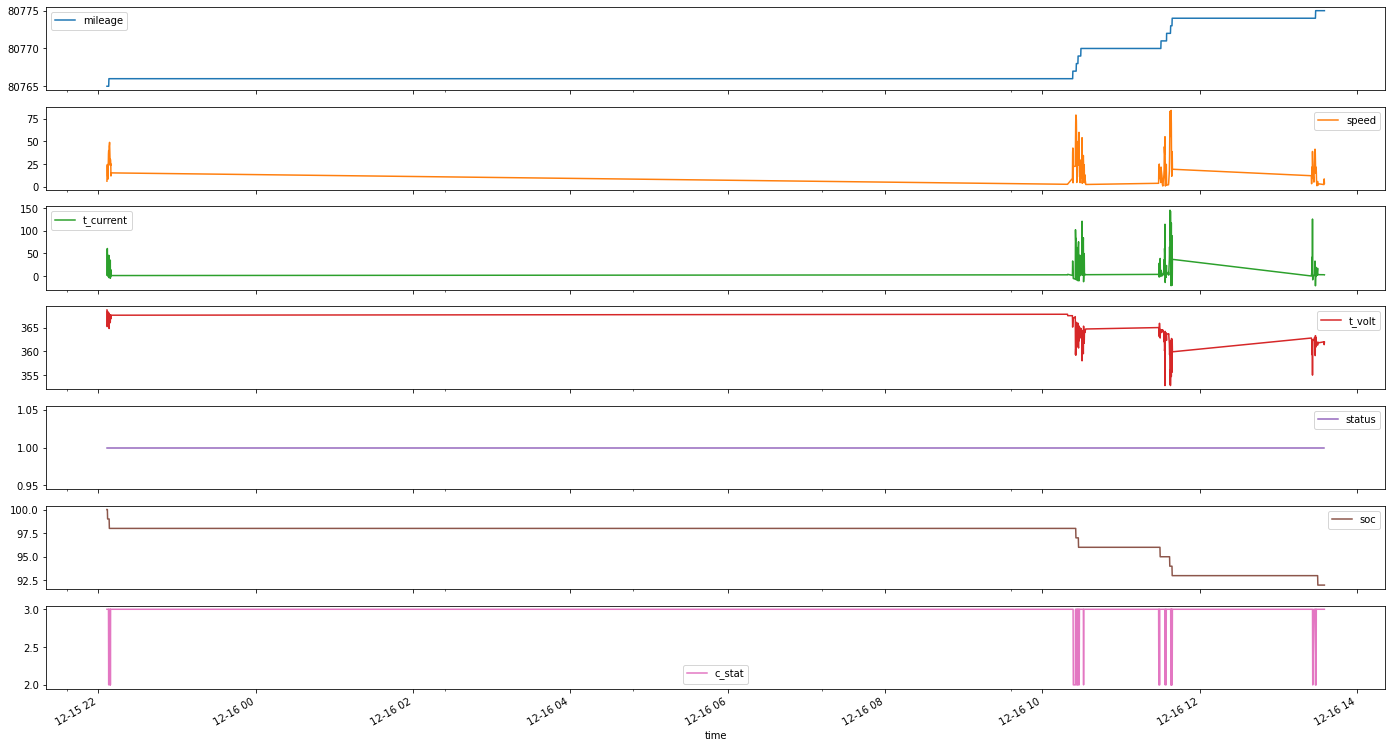

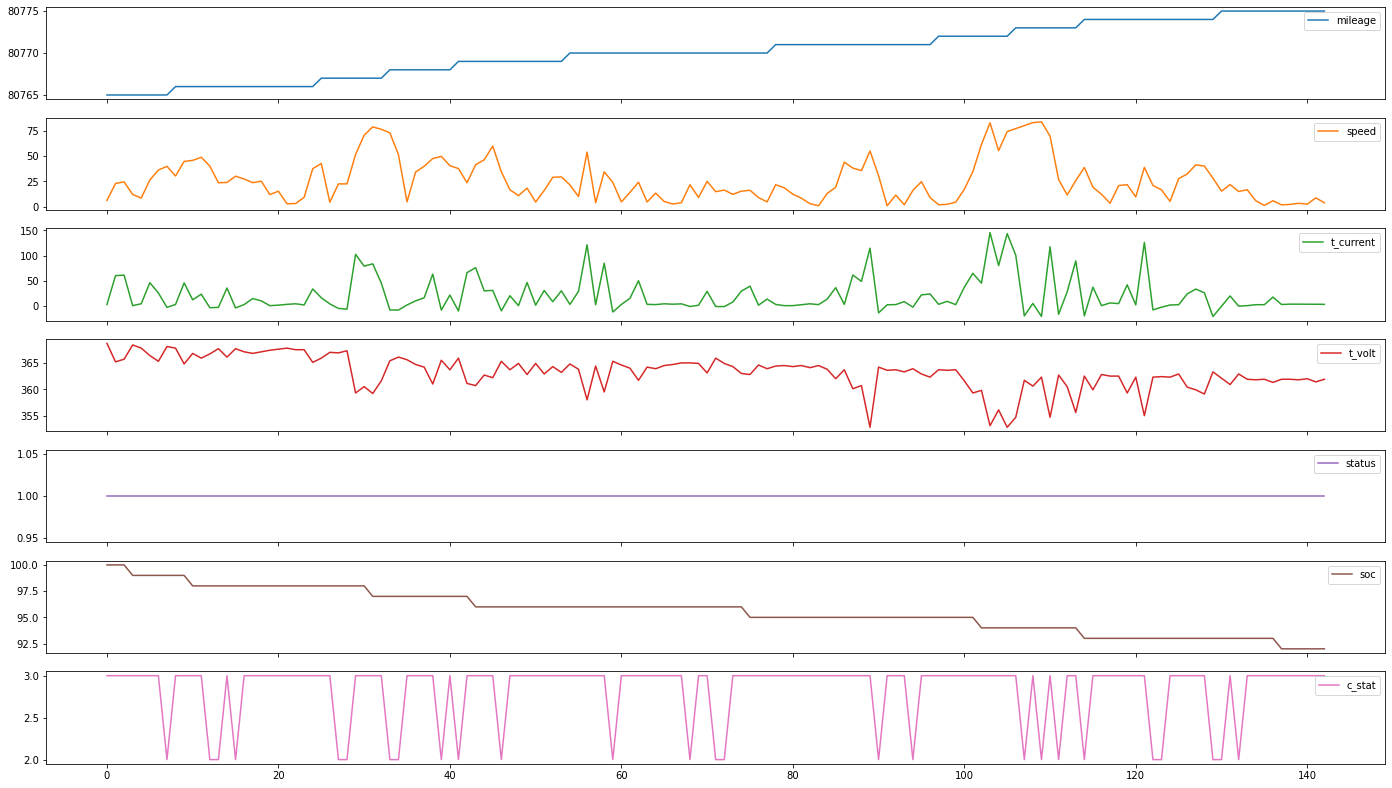

In [15]:
sample=data.query("run_frag==442")
print(len(sample))
plot_7(sample,style="line")
plot_7_withou_time(sample)

#存在大量停车不动的情况，速度接近0，不充电也不放电，电压不一定是0，电流有可能是0

#能不能把速度是0或者接近0的删掉，，，这种情况SOC是变化的，在耗电

想办法删除大量 speed=0，mileage不变，soc不变的片段

# 0208
去除速度是0的片段，然后插值

648
648


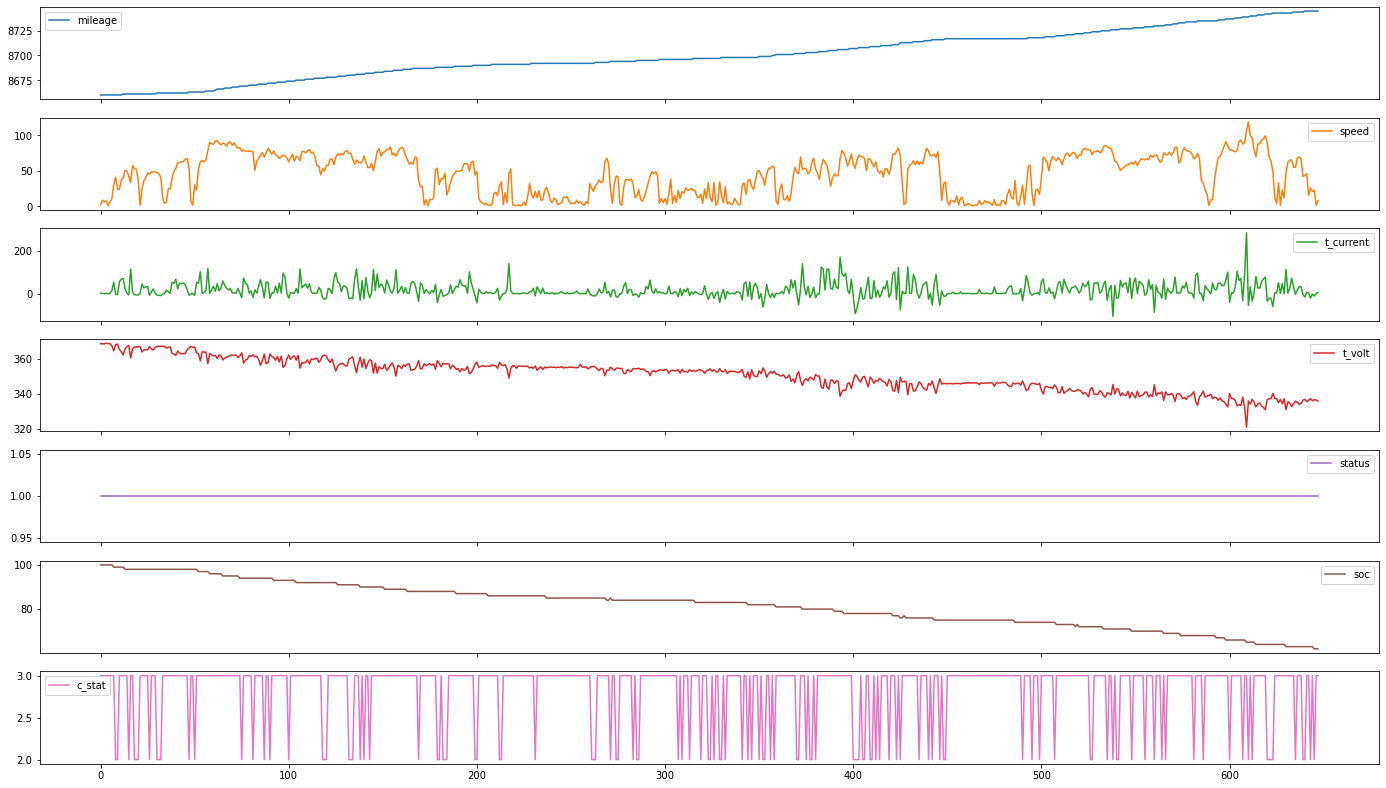

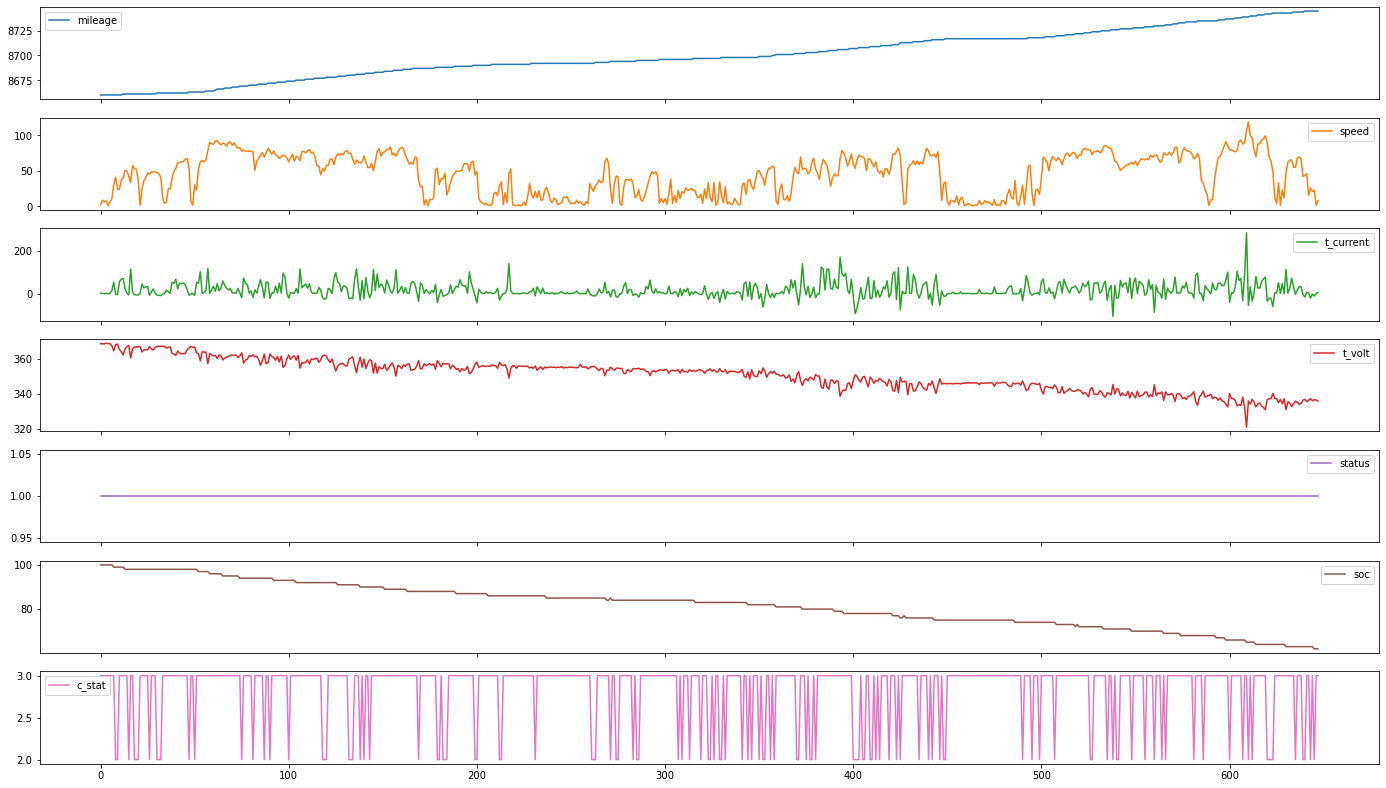

In [16]:
sample=data.query("run_frag==7")
print(len(sample))
print(len(sample.query("speed>=0.01")))
plot_7_withou_time(sample)
plot_7_withou_time(sample.query("speed>=0.01"))

# 0209

## 检查时间跨度和时间间隔

In [17]:
delta_time_list=[]
len_data_list=[]
delta_mile_list=[]
delta_soc_list=[]
vid_list=[]
frag_list=[]
start_time_list=[]

for i in range(1,3528):
    sample=data.query("run_frag=={}".format(i))
    sample.reset_index(drop=True,inplace=True)

    if len(sample)!=0:
        delta_time=sample["time"].iloc[-1]-sample["time"].iloc[0]
        delta_mileage=sample["mileage"].iloc[-1]-sample["mileage"].iloc[0]
        delta_soc=sample["soc"].iloc[-1]-sample["soc"].iloc[0]

        delta_time_list.append(delta_time)
        len_data_list.append(len(sample))
        delta_mile_list.append(delta_mileage)
        delta_soc_list.append(delta_soc)  
        vid_list.append(sample["vid"].values[0])
        frag_list.append(sample["run_frag"].values[0])
        start_time_list.append(sample["time"].values[0])
        
    else:
        print(i)
    
    
    if i%100==0:
        print("完成,",i)
        
data_ana=pd.DataFrame()    
data_ana["vid"]=vid_list
data_ana["run_frag"]=frag_list
data_ana["start_time"]=start_time_list
data_ana["delta_time"]=delta_time_list
data_ana["len_data"]=len_data_list
data_ana["delta_mile"]=delta_mile_list
data_ana["delta_soc"]=delta_soc_list
data_ana["time_p_data"]=data_ana["delta_time"]/data_ana["len_data"]


完成, 100
完成, 200
完成, 300
完成, 400
完成, 500
完成, 600
完成, 700
完成, 800
完成, 900
完成, 1000
完成, 1100
完成, 1200
完成, 1300
完成, 1400
完成, 1500
完成, 1600
完成, 1700
完成, 1800
完成, 1900
完成, 2000
完成, 2100
完成, 2200
完成, 2300
完成, 2400
完成, 2500
完成, 2600
完成, 2700
完成, 2800
完成, 2900
完成, 3000
完成, 3100
完成, 3200
完成, 3300
3315
3316
3317
3318
3319
3320
3321
3322
3323
3324
3325
3326
3327
3328
3329
3330
3331
3332
3333
3334
3335
3336
3337
3338
3339
3340
3341
3342
3343
3344
3345
3346
3347
3348
3349
3350
3351
3352
3353
3354
3355
3356
3357
3358
3359
3360
3361
3362
3363
3364
3365
3366
3367
3368
3369
3370
3371
3372
3373
3374
3375
3376
3377
3378
3379
3380
3381
3382
3383
3384
3385
3386
3387
3388
3389
3390
3391
3392
3393
3394
3395
3396
3397
3398
3399
3400
完成, 3400
3401
3402
3403
3404
3405
3406
3407
3408
3409
3410
3411
3412
3413
3414
3415
3416
3417
3418
3419
3420
3421
3422
3423
3424
3425
3426
3427
3428
3429
3430
3431
3432
3433
3434
3435
3436
3437
3438
3439
3440
3441
3442
3443
3444
3445
3446
3447
3448
3449
3450
3451
3452
3453
3454
345

In [18]:
data_ana

,vid,run_frag,start_time,delta_time,len_data,delta_mile,delta_soc,time_p_data
0,1,1,2018-01-08 19:00:09,0 days 19:56:07,422,63.000000,-39.0,0 days 00:02:50.063981042
1,1,2,2018-01-09 15:43:18,0 days 05:36:54,721,102.000000,-50.0,0 days 00:00:28.036061026
2,1,3,2018-01-10 10:37:36,0 days 08:17:39,1138,157.000000,-89.0,0 days 00:00:26.238137082
3,1,4,2018-01-11 14:40:10,0 days 01:24:42,423,71.000000,-35.0,0 days 00:00:12.014184397
4,1,5,2018-01-11 18:35:32,1 days 18:58:30,829,101.000000,-57.0,0 days 00:03:06.622436670
...,...,...,...,...,...,...,...,...
3309,10,3310,2020-03-17 12:35:51,0 days 00:24:10,122,10.101562,-2.0,0 days 00:00:11.885245901
3310,10,3311,2020-03-17 14:05:37,0 days 03:59:22,850,69.398438,-16.0,0 days 00:00:16.896470588
3311,10,3312,2020-03-17 19:31:13,0 days 14:23:51,760,58.601562,-14.0,0 days 00:01:08.198684210
3312,10,3313,2020-03-18 11:16:28,0 days 02:41:00,693,66.400391,-16.0,0 days 00:00:13.939393939


In [19]:
data_ana["year_month"]=data_ana["start_time"].dt.year.map(str)+"_"+data_ana["start_time"].dt.month.map(str)

In [20]:
data_ana

,vid,run_frag,start_time,delta_time,len_data,delta_mile,delta_soc,time_p_data,year_month
0,1,1,2018-01-08 19:00:09,0 days 19:56:07,422,63.000000,-39.0,0 days 00:02:50.063981042,2018_1
1,1,2,2018-01-09 15:43:18,0 days 05:36:54,721,102.000000,-50.0,0 days 00:00:28.036061026,2018_1
2,1,3,2018-01-10 10:37:36,0 days 08:17:39,1138,157.000000,-89.0,0 days 00:00:26.238137082,2018_1
3,1,4,2018-01-11 14:40:10,0 days 01:24:42,423,71.000000,-35.0,0 days 00:00:12.014184397,2018_1
4,1,5,2018-01-11 18:35:32,1 days 18:58:30,829,101.000000,-57.0,0 days 00:03:06.622436670,2018_1
...,...,...,...,...,...,...,...,...,...
3309,10,3310,2020-03-17 12:35:51,0 days 00:24:10,122,10.101562,-2.0,0 days 00:00:11.885245901,2020_3
3310,10,3311,2020-03-17 14:05:37,0 days 03:59:22,850,69.398438,-16.0,0 days 00:00:16.896470588,2020_3
3311,10,3312,2020-03-17 19:31:13,0 days 14:23:51,760,58.601562,-14.0,0 days 00:01:08.198684210,2020_3
3312,10,3313,2020-03-18 11:16:28,0 days 02:41:00,693,66.400391,-16.0,0 days 00:00:13.939393939,2020_3


In [21]:
data_ana.describe()

,vid,run_frag,delta_time,len_data,delta_mile,delta_soc,time_p_data
count,3314.000000,3314.000000,3314,3314.000000,3314.000000,3314.000000,3314
mean,4.331322,1657.500000,0 days 16:21:14.187990343,1877.042547,134.968738,-47.956246,0 days 00:01:33.314525056
std,2.652770,956.813723,5 days 15:11:28.555616037,2647.181399,1240.180483,22.915208,0 days 00:06:15.642788333
min,1.000000,1.000000,0 days 00:02:48,121.000000,0.000000,-99.000000,0 days 00:00:01.083333333
25%,2.000000,829.250000,0 days 03:32:51.250000,443.250000,62.000000,-65.000000,0 days 00:00:13.790486282
50%,4.000000,1657.500000,0 days 06:03:32.500000,973.000000,97.000000,-49.000000,0 days 00:00:20.050633437
75%,7.000000,2485.750000,0 days 11:46:27.500000,1673.000000,139.000000,-31.000000,0 days 00:00:55.213536462
max,10.000000,3314.000000,305 days 05:21:09,15954.000000,71150.000000,46.000000,0 days 03:02:08.830915872


### 看看异常

#### 时间间隔为负

In [22]:
p=pd.Timedelta(minutes=0)
data_ana[data_ana["delta_time"]<p]

,vid,run_frag,start_time,delta_time,len_data,delta_mile,delta_soc,time_p_data,year_month


#### 数据只有一条

In [23]:
data_ana[data_ana["len_data"]<10]

,vid,run_frag,start_time,delta_time,len_data,delta_mile,delta_soc,time_p_data,year_month


#### delta_soc>0

In [24]:
data_ana[data_ana["delta_soc"]>0]

,vid,run_frag,start_time,delta_time,len_data,delta_mile,delta_soc,time_p_data,year_month
114,1,115,2018-05-11 04:20:16,0 days 06:06:52,954,116.0,14.0,0 days 00:00:23.073375262,2018_5
355,1,356,2018-09-02 02:06:10,0 days 07:47:48,1392,151.0,1.0,0 days 00:00:20.163793103,2018_9
646,1,647,2019-03-25 07:44:46,0 days 10:40:29,763,145.0,2.0,0 days 00:00:50.365661861,2019_3
1304,3,1305,2020-01-04 12:41:54,1 days 20:38:37,1184,103.0,17.0,0 days 00:02:15.740709459,2020_1
1317,3,1318,2020-01-18 13:46:49,0 days 18:39:20,832,97.0,46.0,0 days 00:01:20.721153846,2020_1
...,...,...,...,...,...,...,...,...,...
1343,3,1344,2020-03-20 16:11:50,2 days 16:41:43,980,137.0,19.0,0 days 00:03:57.656122448,2020_3
1684,4,1685,2019-04-16 23:26:55,1 days 08:05:52,236,157.0,5.0,0 days 00:08:09.627118644,2019_4
2003,5,2004,2019-09-06 16:32:54,0 days 03:13:51,177,40.0,21.0,0 days 00:01:05.711864406,2019_9
2231,6,2232,2019-08-23 14:33:43,3 days 08:21:51,309,171.0,17.0,0 days 00:15:36.281553398,2019_8


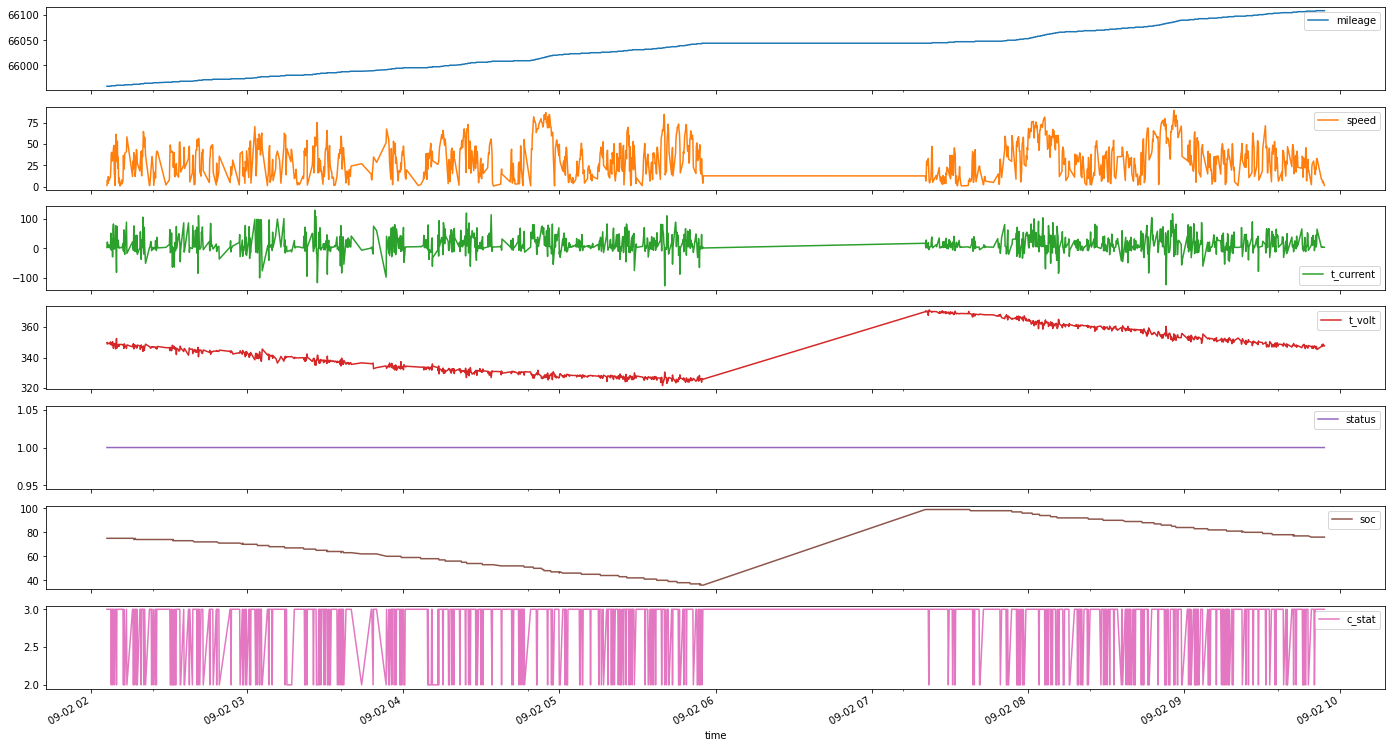

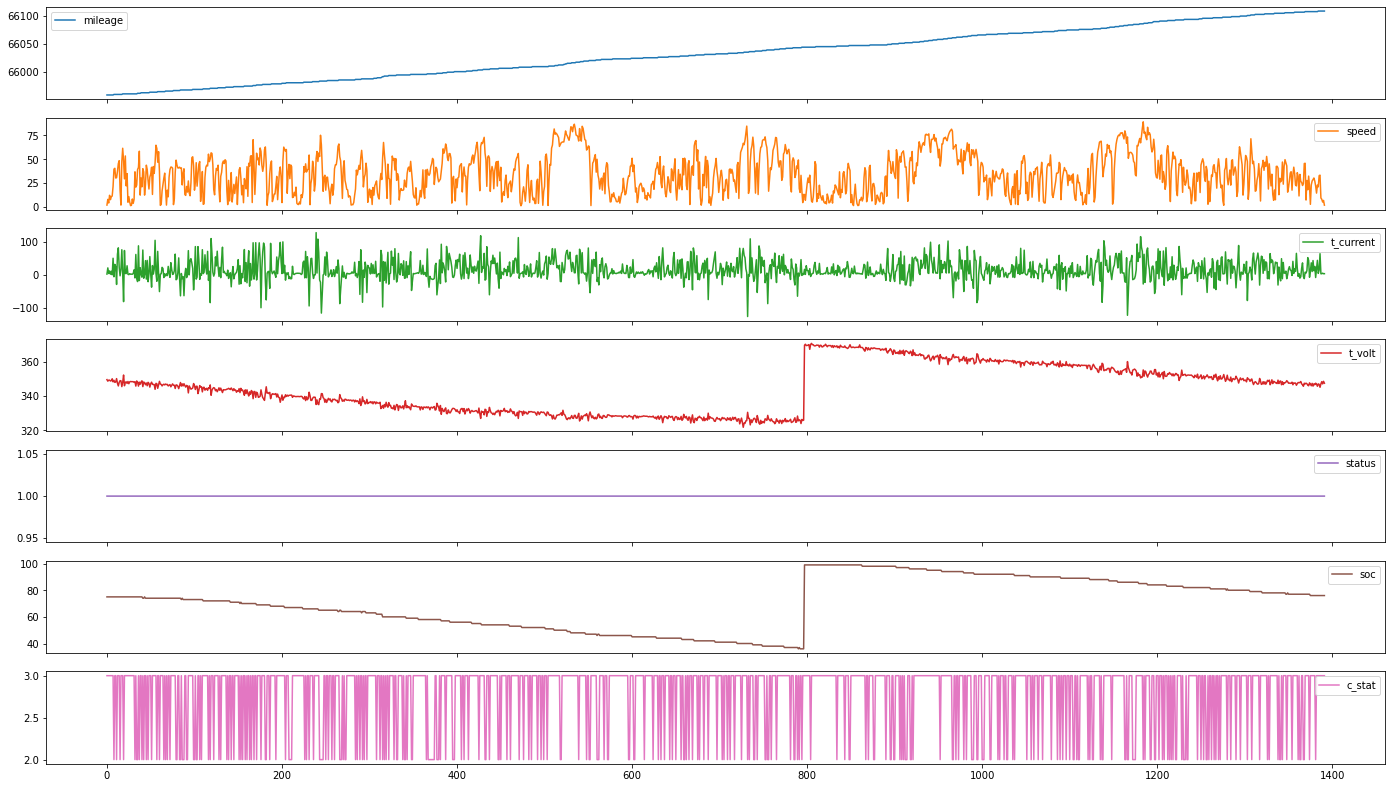

In [25]:
sample=data.query("run_frag==356")
plot_7(sample,style="line")
plot_7_withou_time(sample)

行驶过程中漏了一部分充电过程，这部分就不要了

In [26]:
data_ana=data_ana.query("delta_soc < 0")

In [27]:
data_ana.describe()

,vid,run_frag,delta_time,len_data,delta_mile,delta_soc,time_p_data
count,3300.000000,3300.000000,3300,3300.000000,3300.000000,3300.000000,3300
mean,4.333939,1658.243030,0 days 16:17:54.615757575,1882.046970,135.050727,-48.223030,0 days 00:01:32.770066430
std,2.654045,957.326502,5 days 15:27:56.383107016,2651.546548,1242.805064,22.575634,0 days 00:06:15.953021527
min,1.000000,1.000000,0 days 00:04:18,121.000000,0.000000,-99.000000,0 days 00:00:01.083333333
25%,2.000000,828.750000,0 days 03:32:47.750000,444.000000,61.750000,-65.000000,0 days 00:00:13.782698960
50%,4.000000,1659.500000,0 days 06:02:21,975.000000,97.000000,-49.000000,0 days 00:00:19.987439166
75%,7.000000,2487.250000,0 days 11:38:25.250000,1675.750000,139.000000,-31.000000,0 days 00:00:54.614060157
max,10.000000,3314.000000,305 days 05:21:09,15954.000000,71150.000000,-1.000000,0 days 03:02:08.830915872


#### 时间太长

In [28]:
p=pd.Timedelta(days=1)
data_ana[data_ana["delta_time"]>p]

,vid,run_frag,start_time,delta_time,len_data,delta_mile,delta_soc,time_p_data,year_month
4,1,5,2018-01-11 18:35:32,1 days 18:58:30,829,101.0,-57.0,0 days 00:03:06.622436670,2018_1
16,1,17,2018-01-20 18:25:48,1 days 16:43:14,480,51.0,-33.0,0 days 00:05:05.404166666,2018_1
21,1,22,2018-01-24 16:29:04,1 days 00:36:54,835,99.0,-66.0,0 days 00:01:46.124550898,2018_1
22,1,23,2018-01-25 17:44:38,5 days 20:13:50,584,71.0,-44.0,0 days 00:14:24.434931506,2018_1
24,1,25,2018-02-03 18:51:03,1 days 16:07:53,426,63.0,-39.0,0 days 00:05:39.138497652,2018_2
...,...,...,...,...,...,...,...,...,...
3299,9,3300,2019-11-19 09:20:08,2 days 06:27:38,704,194.0,-63.0,0 days 00:04:38.491477272,2019_11
3300,9,3301,2019-11-21 16:53:02,1 days 19:04:34,646,170.0,-57.0,0 days 00:04:00.052631578,2019_11
3301,9,3302,2019-11-23 14:38:55,3 days 00:24:54,630,156.0,-61.0,0 days 00:06:53.800000,2019_11
3302,9,3303,2019-11-26 16:43:04,5 days 02:43:57,909,433.0,-87.0,0 days 00:08:06.069306930,2019_11


In [29]:
data_ana=data_ana[data_ana["delta_time"]<p]

In [30]:
data_ana.describe()

,vid,run_frag,delta_time,len_data,delta_mile,delta_soc,time_p_data
count,2946.000000,2946.000000,2946,2946.000000,2946.000000,2946.000000,2946
mean,4.326884,1658.319756,0 days 06:50:41.076374745,1970.535981,99.255736,-46.855737,0 days 00:00:38.566094786
std,2.682282,967.518956,0 days 05:05:59.814935869,2761.032352,55.610080,22.290593,0 days 00:01:02.242792995
min,1.000000,1.000000,0 days 00:04:18,121.000000,0.000000,-99.000000,0 days 00:00:01.083333333
25%,2.000000,794.250000,0 days 03:17:25.500000,465.000000,59.000000,-63.000000,0 days 00:00:13.196124846
50%,4.000000,1665.500000,0 days 05:20:36,996.000000,92.000000,-47.000000,0 days 00:00:17.492085179
75%,7.000000,2520.750000,0 days 08:48:03.750000,1706.500000,132.000000,-30.000000,0 days 00:00:40.006345355
max,10.000000,3314.000000,0 days 23:56:39,15954.000000,394.000000,-1.000000,0 days 00:11:02.536585365


#### 里程太短不要

In [31]:
data_ana[data_ana["delta_mile"]<=10]

,vid,run_frag,start_time,delta_time,len_data,delta_mile,delta_soc,time_p_data,year_month
431,1,432,2018-11-25 15:46:48,0 days 01:06:32,121,6.0,-3.0,0 days 00:00:32.991735537,2018_11
441,1,442,2018-12-15 22:06:31,0 days 15:28:40,143,10.0,-8.0,0 days 00:06:29.650349650,2018_12
526,1,527,2019-01-27 16:03:04,0 days 03:32:52,825,0.0,-37.0,0 days 00:00:15.481212121,2019_1
850,2,851,2019-02-22 23:54:51,0 days 14:27:35,198,6.0,-4.0,0 days 00:04:22.904040404,2019_2
1132,2,1133,2019-09-11 23:53:54,0 days 05:14:29,133,10.0,-5.0,0 days 00:02:21.872180451,2019_9
...,...,...,...,...,...,...,...,...,...
3131,9,3132,2018-10-12 11:35:07,0 days 00:31:30,147,9.0,-3.0,0 days 00:00:12.857142857,2018_10
3136,9,3137,2018-10-14 19:59:22,0 days 00:25:30,123,9.0,-4.0,0 days 00:00:12.439024390,2018_10
3146,9,3147,2018-10-21 15:40:16,0 days 00:24:05,176,5.0,-1.0,0 days 00:00:08.210227272,2018_10
3163,9,3164,2018-11-03 16:05:31,0 days 00:31:43,225,10.0,-4.0,0 days 00:00:08.457777777,2018_11


In [32]:
data_ana=data_ana[data_ana["delta_mile"]>10]

In [33]:
data_ana.describe()

,vid,run_frag,delta_time,len_data,delta_mile,delta_soc,time_p_data
count,2912.000000,2912.000000,2912,2912.000000,2912.000000,2912.000000,2912
mean,4.304602,1650.946429,0 days 06:54:19.302884615,1988.918613,100.342170,-47.351992,0 days 00:00:38.662517925
std,2.679157,967.311983,0 days 05:05:02.336901554,2771.555969,55.010571,21.929779,0 days 00:01:02.009094776
min,1.000000,1.000000,0 days 00:18:15,121.000000,10.101562,-99.000000,0 days 00:00:01.087365844
25%,2.000000,788.750000,0 days 03:21:16.500000,478.000000,60.000000,-64.000000,0 days 00:00:13.327709240
50%,4.000000,1649.500000,0 days 05:24:23.500000,1008.000000,93.000000,-48.000000,0 days 00:00:17.634426195
75%,7.000000,2514.250000,0 days 08:51:34.750000,1712.250000,133.000000,-30.000000,0 days 00:00:40.301957060
max,10.000000,3314.000000,0 days 23:56:39,15954.000000,394.000000,-2.000000,0 days 00:11:02.536585365


### 画图分析

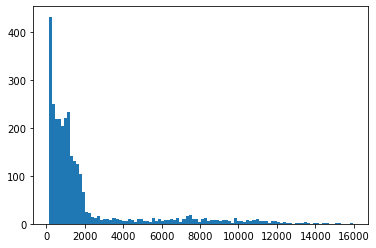

In [34]:
plt.hist(data_ana["len_data"],bins=100)
plt.show()

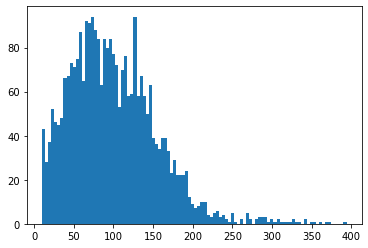

In [35]:
plt.hist(data_ana["delta_mile"],bins=100)
plt.show()

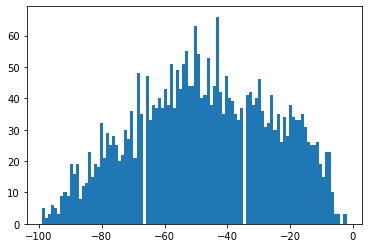

In [36]:
plt.hist(data_ana["delta_soc"],bins=100)
plt.show()

In [37]:
data_ana

,vid,run_frag,start_time,delta_time,len_data,delta_mile,delta_soc,time_p_data,year_month
0,1,1,2018-01-08 19:00:09,0 days 19:56:07,422,63.000000,-39.0,0 days 00:02:50.063981042,2018_1
1,1,2,2018-01-09 15:43:18,0 days 05:36:54,721,102.000000,-50.0,0 days 00:00:28.036061026,2018_1
2,1,3,2018-01-10 10:37:36,0 days 08:17:39,1138,157.000000,-89.0,0 days 00:00:26.238137082,2018_1
3,1,4,2018-01-11 14:40:10,0 days 01:24:42,423,71.000000,-35.0,0 days 00:00:12.014184397,2018_1
5,1,6,2018-01-14 13:14:45,0 days 03:37:22,289,32.000000,-17.0,0 days 00:00:45.128027681,2018_1
...,...,...,...,...,...,...,...,...,...
3309,10,3310,2020-03-17 12:35:51,0 days 00:24:10,122,10.101562,-2.0,0 days 00:00:11.885245901,2020_3
3310,10,3311,2020-03-17 14:05:37,0 days 03:59:22,850,69.398438,-16.0,0 days 00:00:16.896470588,2020_3
3311,10,3312,2020-03-17 19:31:13,0 days 14:23:51,760,58.601562,-14.0,0 days 00:01:08.198684210,2020_3
3312,10,3313,2020-03-18 11:16:28,0 days 02:41:00,693,66.400391,-16.0,0 days 00:00:13.939393939,2020_3


In [ ]:
# 有2912段，基本符合要求

# 最后分类

In [42]:
frag_list=data_ana["run_frag"].values.tolist()

In [43]:
data_useful=data.loc[(data['run_frag'].isin(frag_list))]

In [45]:
vid_Trans(data_useful,'run_frag')

In [46]:
data_useful

,vid,status,c_stat,speed,mileage,t_volt,t_current,soc,max_cell_volt,min_cell_volt,max_temp,min_temp,time,run_frag
1,1,1.0,3.0,6.7,8130.000000,363.899994,1.6,94.0,4.061,4.021,5.0,4.0,2018-01-08 19:00:09,1
2,1,1.0,3.0,2.3,8130.000000,363.700012,4.5,94.0,4.062,4.023,5.0,4.0,2018-01-08 19:00:19,1
4,1,1.0,3.0,13.0,8130.000000,363.799988,1.5,94.0,4.061,4.021,5.0,4.0,2018-01-08 19:00:39,1
20,1,1.0,3.0,2.0,8130.000000,363.500000,4.0,94.0,4.060,4.015,5.0,4.0,2018-01-08 19:03:13,1
21,1,1.0,3.0,7.8,8130.000000,363.600006,2.6,94.0,4.061,4.018,5.0,4.0,2018-01-08 19:03:23,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14115936,10,1.0,3.0,17.6,28967.500000,367.799988,1.3,55.0,3.760,3.737,27.0,25.0,2020-03-18 16:40:12,2912
14115940,10,1.0,2.0,23.6,28967.599609,367.799988,-2.2,55.0,3.758,3.735,27.0,25.0,2020-03-18 16:40:52,2912
14115941,10,1.0,2.0,13.3,28967.599609,368.100006,-3.8,55.0,3.763,3.740,27.0,25.0,2020-03-18 16:41:02,2912
14115942,10,1.0,3.0,2.5,28967.699219,367.799988,2.2,55.0,3.760,3.736,27.0,25.0,2020-03-18 16:41:12,2912


In [ ]:
data_useful["freq"]=data_useful[""]

In [56]:
#采样频率（计数）
new_data=pd.DataFrame()
for frag in range(1,2913):
    data_frag=data_useful[data_useful["run_frag"]==frag]
    data_frag.reset_index(drop=True,inplace=True)
    data_frag["time_diff"]=data_frag["time"].diff()
    print(frag)
#     print(data_frag["time_diff"].value_counts())
#     print(type(data_frag["time_diff"].value_counts().index[0]))
    freq=data_frag["time_diff"].value_counts().index[0].seconds#找到每个行程的时间间隔
    data_frag["freq"]=freq
    del data_frag["time_diff"]
    new_data=pd.concat([new_data,data_frag])
new_data.reset_index(drop=True,inplace=True)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064


,vid,status,c_stat,speed,mileage,t_volt,t_current,soc,max_cell_volt,min_cell_volt,max_temp,min_temp,time,run_frag,freq
0,1,1.0,3.0,6.7,8130.000000,363.899994,1.6,94.0,4.061,4.021,5.0,4.0,2018-01-08 19:00:09,1,10
1,1,1.0,3.0,2.3,8130.000000,363.700012,4.5,94.0,4.062,4.023,5.0,4.0,2018-01-08 19:00:19,1,10
2,1,1.0,3.0,13.0,8130.000000,363.799988,1.5,94.0,4.061,4.021,5.0,4.0,2018-01-08 19:00:39,1,10
3,1,1.0,3.0,2.0,8130.000000,363.500000,4.0,94.0,4.060,4.015,5.0,4.0,2018-01-08 19:03:13,1,10
4,1,1.0,3.0,7.8,8130.000000,363.600006,2.6,94.0,4.061,4.018,5.0,4.0,2018-01-08 19:03:23,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5791726,10,1.0,3.0,17.6,28967.500000,367.799988,1.3,55.0,3.760,3.737,27.0,25.0,2020-03-18 16:40:12,2912,10
5791727,10,1.0,2.0,23.6,28967.599609,367.799988,-2.2,55.0,3.758,3.735,27.0,25.0,2020-03-18 16:40:52,2912,10
5791728,10,1.0,2.0,13.3,28967.599609,368.100006,-3.8,55.0,3.763,3.740,27.0,25.0,2020-03-18 16:41:02,2912,10
5791729,10,1.0,3.0,2.5,28967.699219,367.799988,2.2,55.0,3.760,3.736,27.0,25.0,2020-03-18 16:41:12,2912,10


In [57]:
new_data

,vid,status,c_stat,speed,mileage,t_volt,t_current,soc,max_cell_volt,min_cell_volt,max_temp,min_temp,time,run_frag,freq
0,1,1.0,3.0,6.7,8130.000000,363.899994,1.6,94.0,4.061,4.021,5.0,4.0,2018-01-08 19:00:09,1,10
1,1,1.0,3.0,2.3,8130.000000,363.700012,4.5,94.0,4.062,4.023,5.0,4.0,2018-01-08 19:00:19,1,10
2,1,1.0,3.0,13.0,8130.000000,363.799988,1.5,94.0,4.061,4.021,5.0,4.0,2018-01-08 19:00:39,1,10
3,1,1.0,3.0,2.0,8130.000000,363.500000,4.0,94.0,4.060,4.015,5.0,4.0,2018-01-08 19:03:13,1,10
4,1,1.0,3.0,7.8,8130.000000,363.600006,2.6,94.0,4.061,4.018,5.0,4.0,2018-01-08 19:03:23,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5791726,10,1.0,3.0,17.6,28967.500000,367.799988,1.3,55.0,3.760,3.737,27.0,25.0,2020-03-18 16:40:12,2912,10
5791727,10,1.0,2.0,23.6,28967.599609,367.799988,-2.2,55.0,3.758,3.735,27.0,25.0,2020-03-18 16:40:52,2912,10
5791728,10,1.0,2.0,13.3,28967.599609,368.100006,-3.8,55.0,3.763,3.740,27.0,25.0,2020-03-18 16:41:02,2912,10
5791729,10,1.0,3.0,2.5,28967.699219,367.799988,2.2,55.0,3.760,3.736,27.0,25.0,2020-03-18 16:41:12,2912,10


## 分频率

In [62]:
new_data["freq"].value_counts()

1     3644633
10    2022637
30      86110
5       31748
2        1783
       ...   
26        326
31        280
16        252
32        199
34        137
Name: freq, Length: 15, dtype: int64

### 去掉间隔不是1和10的数据

In [66]:
frag_list=[1,10]
new_data_1_10=new_data.loc[(new_data['freq'].isin(frag_list))]

In [67]:
new_data_1_10.groupby(["freq","run_frag"]).count()

vid  status  c_stat  speed  mileage  t_volt  t_current   soc  \
freq run_frag                                                                  
1    1128      8514    8514    8514   8514     8514    8514       8514  8514   
     1655       961     961     961    961      961     961        961   961   
     1656      1042    1042    1042   1042     1042    1042       1042  1042   
     1657       621     621     621    621      621     621        621   621   
     1658       400     400     400    400      400     400        400   400   
...             ...     ...     ...    ...      ...     ...        ...   ...   
10   2908       122     122     122    122      122     122        122   122   
     2909       850     850     850    850      850     850        850   850   
     2910       760     760     760    760      760     760        760   760   
     2911       693     693     693    693      693     693        693   693   
     2912       630     630     630    630      630     630        630   630   

               max_cell_volt  min_cell_volt  max_temp  min_temp  time  month  
freq run_frag                                                                 
1    1128               8514           8514      8514      8514  8514   8514  
     1655                961            961       961       961   961    961  
     1656               1042           1042      1042      1042  1042   1042  
     1657                621            621       621       621   621    621  
     1658                400            400       400       400   400    400  
...                      ...            ...       ...       ...   ...    ...  
10   2908                122            122       122       122   122    122  
     2909                850            850       850       850   850    850  
     2910                760            760       760       760   760    760  
     2911                693            693       693       693   693    693  
     2912                630            630       630       630   630    630  

[2511 rows x 14 columns]

In [68]:
vid_Trans(new_data_1_10,'run_frag')

In [70]:
new_data_1_10.reset_index(drop=True,inplace=True)

In [71]:
new_data_1_10

,vid,status,c_stat,speed,mileage,t_volt,t_current,soc,max_cell_volt,min_cell_volt,max_temp,min_temp,time,run_frag,freq,month
0,1,1.0,3.0,6.7,8130.000000,363.899994,1.6,94.0,4.061,4.021,5.0,4.0,2018-01-08 19:00:09,1,10,1
1,1,1.0,3.0,2.3,8130.000000,363.700012,4.5,94.0,4.062,4.023,5.0,4.0,2018-01-08 19:00:19,1,10,1
2,1,1.0,3.0,13.0,8130.000000,363.799988,1.5,94.0,4.061,4.021,5.0,4.0,2018-01-08 19:00:39,1,10,1
3,1,1.0,3.0,2.0,8130.000000,363.500000,4.0,94.0,4.060,4.015,5.0,4.0,2018-01-08 19:03:13,1,10,1
4,1,1.0,3.0,7.8,8130.000000,363.600006,2.6,94.0,4.061,4.018,5.0,4.0,2018-01-08 19:03:23,1,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5667265,10,1.0,3.0,17.6,28967.500000,367.799988,1.3,55.0,3.760,3.737,27.0,25.0,2020-03-18 16:40:12,2511,10,3
5667266,10,1.0,2.0,23.6,28967.599609,367.799988,-2.2,55.0,3.758,3.735,27.0,25.0,2020-03-18 16:40:52,2511,10,3
5667267,10,1.0,2.0,13.3,28967.599609,368.100006,-3.8,55.0,3.763,3.740,27.0,25.0,2020-03-18 16:41:02,2511,10,3
5667268,10,1.0,3.0,2.5,28967.699219,367.799988,2.2,55.0,3.760,3.736,27.0,25.0,2020-03-18 16:41:12,2511,10,3


## 分月份

In [72]:
new_data_1_10["month"]=new_data_1_10["time"].dt.month

In [73]:
new_data_1_10

,vid,status,c_stat,speed,mileage,t_volt,t_current,soc,max_cell_volt,min_cell_volt,max_temp,min_temp,time,run_frag,freq,month
0,1,1.0,3.0,6.7,8130.000000,363.899994,1.6,94.0,4.061,4.021,5.0,4.0,2018-01-08 19:00:09,1,10,1
1,1,1.0,3.0,2.3,8130.000000,363.700012,4.5,94.0,4.062,4.023,5.0,4.0,2018-01-08 19:00:19,1,10,1
2,1,1.0,3.0,13.0,8130.000000,363.799988,1.5,94.0,4.061,4.021,5.0,4.0,2018-01-08 19:00:39,1,10,1
3,1,1.0,3.0,2.0,8130.000000,363.500000,4.0,94.0,4.060,4.015,5.0,4.0,2018-01-08 19:03:13,1,10,1
4,1,1.0,3.0,7.8,8130.000000,363.600006,2.6,94.0,4.061,4.018,5.0,4.0,2018-01-08 19:03:23,1,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5667265,10,1.0,3.0,17.6,28967.500000,367.799988,1.3,55.0,3.760,3.737,27.0,25.0,2020-03-18 16:40:12,2511,10,3
5667266,10,1.0,2.0,23.6,28967.599609,367.799988,-2.2,55.0,3.758,3.735,27.0,25.0,2020-03-18 16:40:52,2511,10,3
5667267,10,1.0,2.0,13.3,28967.599609,368.100006,-3.8,55.0,3.763,3.740,27.0,25.0,2020-03-18 16:41:02,2511,10,3
5667268,10,1.0,3.0,2.5,28967.699219,367.799988,2.2,55.0,3.760,3.736,27.0,25.0,2020-03-18 16:41:12,2511,10,3


## 分里程长短

In [78]:
delta_miles_list=[]
res=[]
append=res.append
for i in range(1,2512):
    data_i=new_data_1_10[new_data_1_10["run_frag"]==i]
#     print(data_i["mileage"].values[0])
    print(i)
    data_i["delta_mileage"]=data_i["mileage"]-data_i["mileage"].values[0]
    delta_miles=data_i["mileage"].values[-1]-data_i["mileage"].values[0]
    delta_miles_list.append(delta_miles)
    data_i["delta_soc"]=data_i["soc"].values[0]-data_i["soc"]
    append(data_i)
df_new=pd.concat(res)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066


In [79]:
df_new

,vid,status,c_stat,speed,mileage,t_volt,t_current,soc,max_cell_volt,min_cell_volt,max_temp,min_temp,time,run_frag,freq,month,delta_mileage,delta_soc
0,1,1.0,3.0,6.7,8130.000000,363.899994,1.6,94.0,4.061,4.021,5.0,4.0,2018-01-08 19:00:09,1,10,1,0.000000,0.0
1,1,1.0,3.0,2.3,8130.000000,363.700012,4.5,94.0,4.062,4.023,5.0,4.0,2018-01-08 19:00:19,1,10,1,0.000000,0.0
2,1,1.0,3.0,13.0,8130.000000,363.799988,1.5,94.0,4.061,4.021,5.0,4.0,2018-01-08 19:00:39,1,10,1,0.000000,0.0
3,1,1.0,3.0,2.0,8130.000000,363.500000,4.0,94.0,4.060,4.015,5.0,4.0,2018-01-08 19:03:13,1,10,1,0.000000,0.0
4,1,1.0,3.0,7.8,8130.000000,363.600006,2.6,94.0,4.061,4.018,5.0,4.0,2018-01-08 19:03:23,1,10,1,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5667265,10,1.0,3.0,17.6,28967.500000,367.799988,1.3,55.0,3.760,3.737,27.0,25.0,2020-03-18 16:40:12,2511,10,3,49.199219,12.0
5667266,10,1.0,2.0,23.6,28967.599609,367.799988,-2.2,55.0,3.758,3.735,27.0,25.0,2020-03-18 16:40:52,2511,10,3,49.298828,12.0
5667267,10,1.0,2.0,13.3,28967.599609,368.100006,-3.8,55.0,3.763,3.740,27.0,25.0,2020-03-18 16:41:02,2511,10,3,49.298828,12.0
5667268,10,1.0,3.0,2.5,28967.699219,367.799988,2.2,55.0,3.760,3.736,27.0,25.0,2020-03-18 16:41:12,2511,10,3,49.398438,12.0


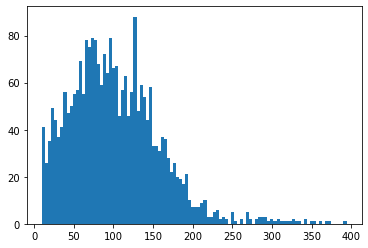

In [81]:
plt.hist(delta_miles_list,bins=100)
plt.show()

# 备份数据

In [82]:
df_new.to_pickle("2511段大于10km的行驶片段（间隔1秒和10秒）.pickle")

In [103]:
df_new[df_new["freq"]==10]

KeyboardInterrupt: 

In [85]:
df_new[df_new["freq"]==1]["run_frag"].value_counts()

2023    15954
1955    15838
2010    15178
1988    15102
1984    15005
        ...  
1657      151
1661      144
1663      135
1659      133
2500      125
Name: run_frag, Length: 567, dtype: int64

In [86]:
df_new[df_new["freq"]==10]["run_frag"].value_counts()

357     3850
790     3841
95      3792
800     3779
50      3693
        ... 
1635     129
1417     126
2471     126
2507     122
2472     121
Name: run_frag, Length: 1944, dtype: int64

567段时间间隔是1S的
1944段时间间隔是10S的

In [87]:
df_new[df_new["freq"]==1]["month"].value_counts()

12    819304
11    678501
8     589454
10    531619
9     479454
7     347277
1     188742
6       8636
5       1646
Name: month, dtype: int64

In [90]:
df_new[df_new["freq"]==10]["month"].value_counts()

1     268849
3     220205
5     206164
8     184005
12    178692
6     170772
9     160674
4     157552
7     139081
10    128136
2     112748
11     95759
Name: month, dtype: int64

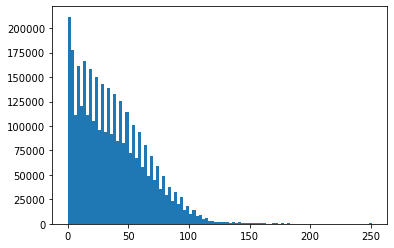

In [92]:
plt.hist(df_new[df_new["freq"]==1]["delta_mileage"],bins=100)
plt.show()

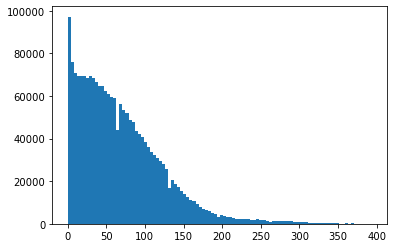

In [93]:
plt.hist(df_new[df_new["freq"]==10]["delta_mileage"],bins=100)
plt.show()

# 画图

In [97]:
df_new

,vid,status,c_stat,speed,mileage,t_volt,t_current,soc,max_cell_volt,min_cell_volt,max_temp,min_temp,time,run_frag,freq,month,delta_mileage,delta_soc
0,1,1.0,3.0,6.7,8130.000000,363.899994,1.6,94.0,4.061,4.021,5.0,4.0,2018-01-08 19:00:09,1,10,1,0.000000,0.0
1,1,1.0,3.0,2.3,8130.000000,363.700012,4.5,94.0,4.062,4.023,5.0,4.0,2018-01-08 19:00:19,1,10,1,0.000000,0.0
2,1,1.0,3.0,13.0,8130.000000,363.799988,1.5,94.0,4.061,4.021,5.0,4.0,2018-01-08 19:00:39,1,10,1,0.000000,0.0
3,1,1.0,3.0,2.0,8130.000000,363.500000,4.0,94.0,4.060,4.015,5.0,4.0,2018-01-08 19:03:13,1,10,1,0.000000,0.0
4,1,1.0,3.0,7.8,8130.000000,363.600006,2.6,94.0,4.061,4.018,5.0,4.0,2018-01-08 19:03:23,1,10,1,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5667265,10,1.0,3.0,17.6,28967.500000,367.799988,1.3,55.0,3.760,3.737,27.0,25.0,2020-03-18 16:40:12,2511,10,3,49.199219,12.0
5667266,10,1.0,2.0,23.6,28967.599609,367.799988,-2.2,55.0,3.758,3.735,27.0,25.0,2020-03-18 16:40:52,2511,10,3,49.298828,12.0
5667267,10,1.0,2.0,13.3,28967.599609,368.100006,-3.8,55.0,3.763,3.740,27.0,25.0,2020-03-18 16:41:02,2511,10,3,49.298828,12.0
5667268,10,1.0,3.0,2.5,28967.699219,367.799988,2.2,55.0,3.760,3.736,27.0,25.0,2020-03-18 16:41:12,2511,10,3,49.398438,12.0


In [95]:
def traj_i(i=1):
    sample=df_new[df_new["traj_index"]==i]
    sample.reset_index(drop=True,inplace=True)

    # 求t-1到t单位时间用电量
    sample["energyuse"] = sample["t_power"]*1/3600  # kwh
    # 求t-1到t单位时间行驶距离
    sample["distance"] = sample["speed"]*1/3.6  # m
    #累计电量
    sample["energyuse_sum"]=sample["energyuse"].cumsum()   #kwh
    #累计里程
    sample["distance_sum"]=sample["distance"].cumsum()/1000    #km

    #剩余能量
    sample["remain_energy_by_soc"]=25*sample["soc"]/100
    #剩余能量=总能量-累计电量
    sample["remain_energy"]=25*sample["soc"].values[0]/100-sample["energyuse_sum"]
    
    
    #过去累计电量
    sample["energyuse_before"]=sample["energyuse"].rolling(60).sum()   #km
    #过去累计里程
    sample["distance_before"] =sample["distance"].rolling(60).sum()/1000    #km
    sample["energyuse_before"].replace([np.nan], 0, inplace=True)
    sample["distance_before"].replace([np.nan], 0, inplace=True)
    
    #未来累计电量
    sample["energyuse_pre"]=sample["energyuse"].rolling(60).sum()   #km
    sample["energyuse_pre"]=sample["energyuse_pre"].shift(-60)
    #未来累计里程
    sample["distance_pre"]=sample["distance"].rolling(60).sum()/1000    #km
    sample["distance_pre"]=sample["distance_pre"].shift(-60)
    sample["energyuse_pre"].replace([np.nan], 0, inplace=True)
    sample["distance_pre"].replace([np.nan], 0, inplace=True)

    #预测平均能耗=（累计电量）/（累计里程）
    sample["ene_pre_mean"]=(sample["energyuse_pre"])/(sample["distance_pre"])   #kwh/km

    #累计平均能耗=（平均值+累计电量）/（平均值+累计里程）
    sample["ene_consum_mean3"]=(ene+sample["energyuse_before"]+sample["energyuse_pre"])/(dd+sample["distance_before"]+sample["distance_pre"])   #kwh/km


    #平均能耗计算里程
    sample["RDR_mean"]=sample["remain_energy"]/np.mean(ENEPDD_list)
    
    #等效能耗计算里程
    sample["RDR_mean_consum3"]=sample["remain_energy"]/sample["ene_consum_mean3"]

    
     #平均能耗计算里程
    sample["RDR_mean_local"]=sample["RDR_mean"]-sample["RDR_mean"].values[-1]
    
    #等效能耗计算里程
    sample["RDR_mean_consum3_local"]=sample["RDR_mean_consum3"]-sample["RDR_mean_consum3"].values[-1]
    #实际行驶里程倒着
    sample["inverse_distance"]=sample["distance_sum"].values[-1]-sample["distance_sum"]    
    
    psi=sample["RDR_mean_local"].values[0]/sample["inverse_distance"].values[0]
    
    return sample,psi

In [96]:
RDR=[]
distance=[]
psi_=[]
for j in range(1,357):
    sample_i,psi=traj_i(i=j)
    RDR.append(sample_i["RDR_mean_local"].values[0])
    distance.append(sample_i["inverse_distance"].values[0])
    psi_.append(psi)

KeyError: 'traj_index'

In [57]:
sample_i["RDR_mean_local"].values[0]

61.52064974737068

In [58]:
sample_i["inverse_distance"].values[0]

59.02404166666655

In [59]:
from sklearn.metrics import mean_squared_error,mean_absolute_error # 均方误差

In [60]:
mean_squared_error(RDR,distance)

117.59505357440254

In [61]:
mean_absolute_error(RDR,distance)

9.015791154808392

In [62]:
np.mean(psi_)

0.9197925172797338

In [63]:
for j in range(1,107):
    sample_i=traj_i(i=j)
    RDR.append(sample_i["RDR_mean_local"].values[0])
    distance.append(sample_i["inverse_distance"].values[0])

TypeError: tuple indices must be integers or slices, not str

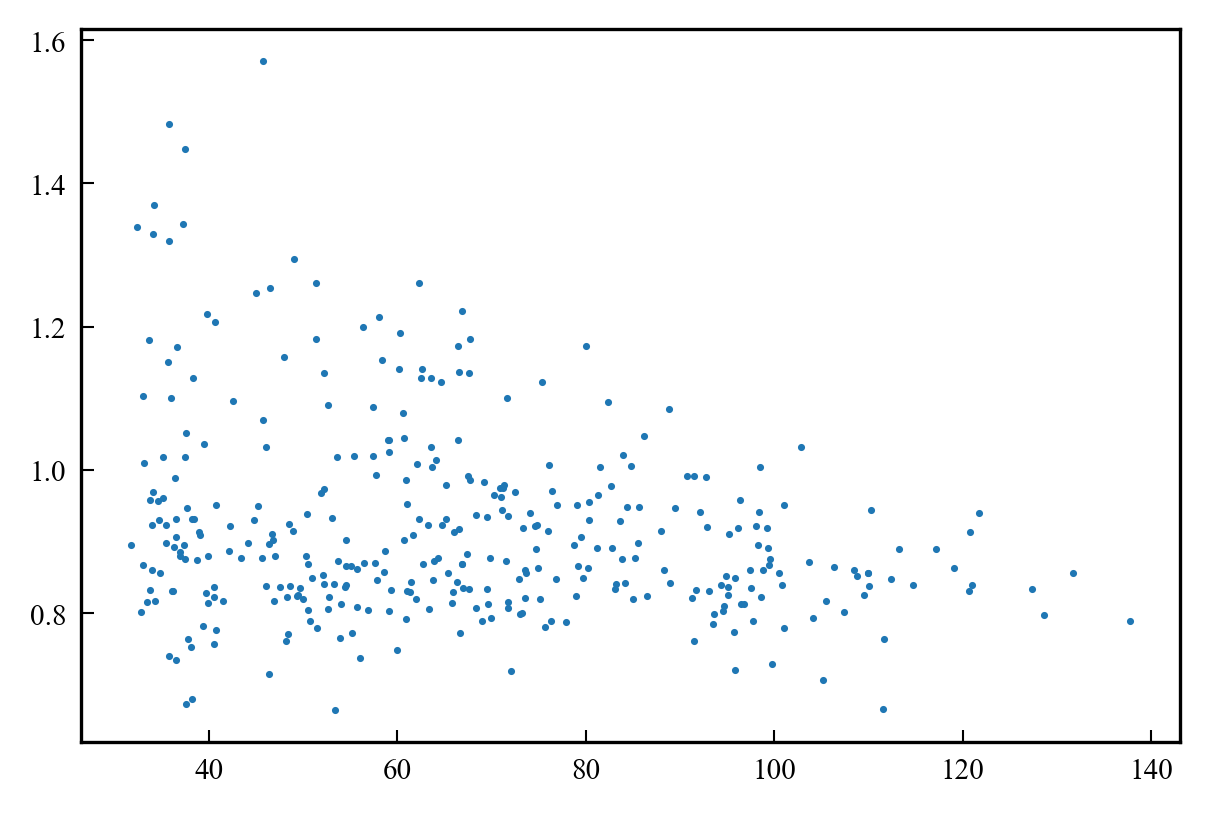

In [64]:
plt.figure()
plt.scatter(distance,psi_,s=0.5)

## 最后出图

In [65]:
from matplotlib.font_manager import FontProperties

fontP = FontProperties()
fontP.set_size('xx-small')

In [66]:
fontP.set_size('xx-small')
ax1.legend(loc=0, ncol=1, bbox_to_anchor=(0, 0, 1, 1),
           prop = fontP,fancybox=True,shadow=False,title='LEGEND')

NameError: name 'ax1' is not defined

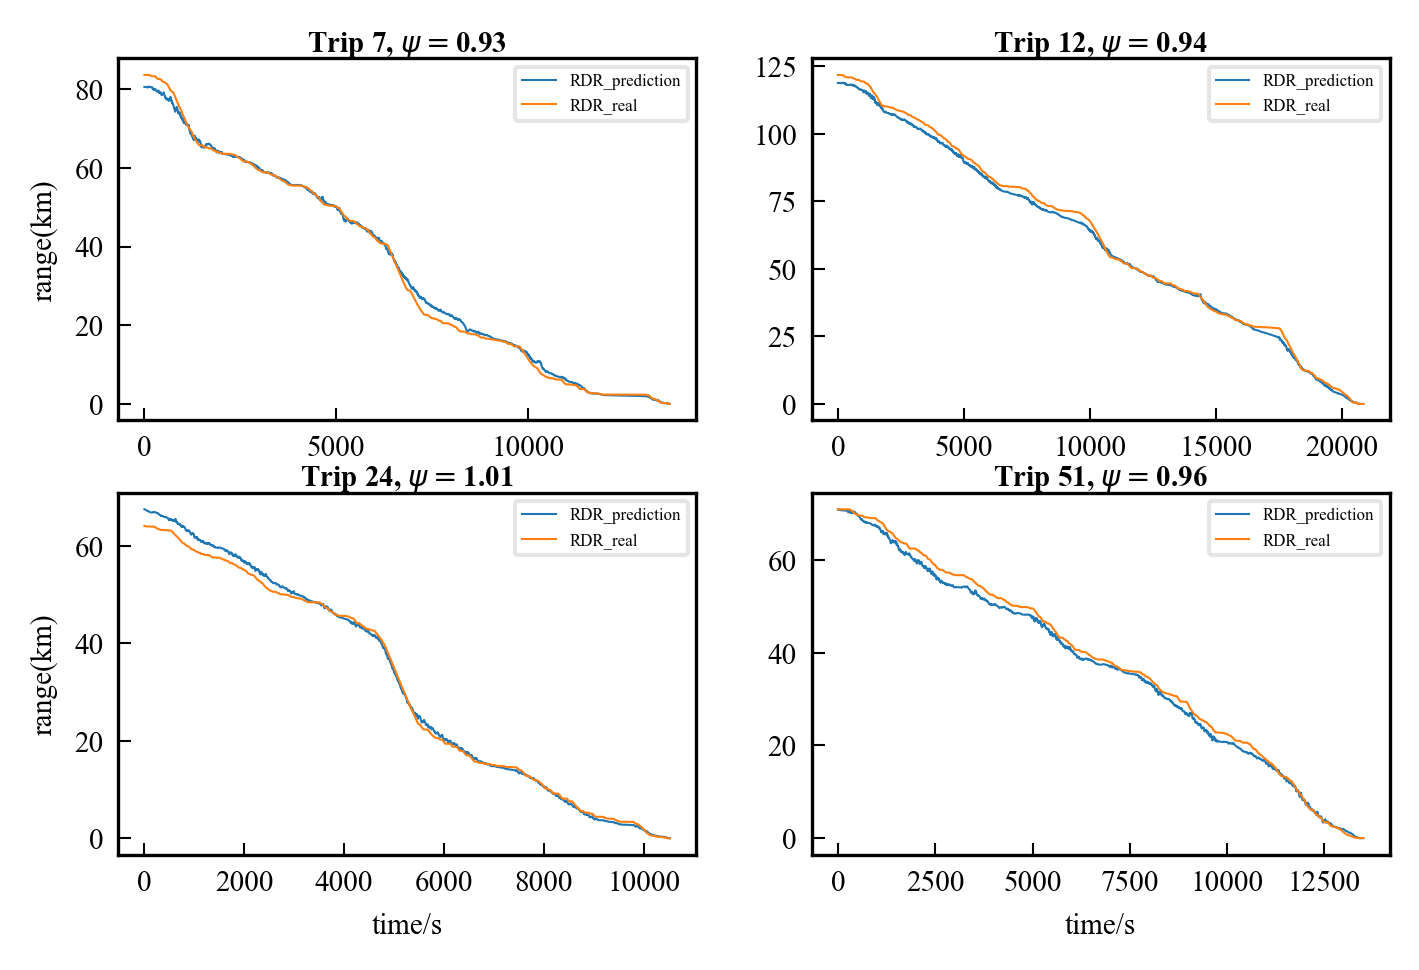

In [67]:
f, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2,figsize=(14/2.56,9/2.56),dpi=300)  # sharey=True 公用一个y轴
# for i in [7,12,24,51]:
    
sample_i,psi=traj_i(i=7)
ax1.plot(sample_i["RDR_mean_consum3_local"],linewidth=0.5)
ax1.plot(sample_i["inverse_distance"],linewidth=0.5)
ax1.legend(["RDR_prediction","RDR_real"],prop = fontP)
# ax1.set_xlabel("time(second)")
ax1.set_ylabel("range(km)")
ax1.set_title(r"Trip {}, $\psi=${:.2f}".format(7,psi),y=0.95,weight='bold')
    
sample_i,psi=traj_i(i=12)
ax2.plot(sample_i["RDR_mean_consum3_local"],linewidth=0.5)
ax2.plot(sample_i["inverse_distance"],linewidth=0.5)
ax2.legend(["RDR_prediction","RDR_real"],prop = fontP)
# ax2.set_xlabel("time(second)")
# ax2.set_ylabel("Range(km)")
ax2.set_title(r"Trip {}, $\psi=${:.2f}".format(12,psi),y=0.95,weight='bold')   

sample_i,psi=traj_i(i=24)
ax3.plot(sample_i["RDR_mean_consum3_local"],linewidth=0.5)
ax3.plot(sample_i["inverse_distance"],linewidth=0.5)
ax3.legend(["RDR_prediction","RDR_real"],prop = fontP)
ax3.set_xlabel("time/s")
ax3.set_ylabel("range(km)")
ax3.set_title(r"Trip {}, $\psi=${:.2f}".format(24,psi),y=0.95,weight='bold')

sample_i,psi=traj_i(i=51)
ax4.plot(sample_i["RDR_mean_consum3_local"],linewidth=0.5)
ax4.plot(sample_i["inverse_distance"],linewidth=0.5)
ax4.legend(["RDR_prediction","RDR_real"],prop = fontP)
ax4.set_xlabel("time/s")

ax4.set_title(r"Trip {}, $\psi=${:.2f}".format(51,psi),y=0.95,weight='bold')

plt.savefig("../处理过程的画图数据/剩余续驶里程对比/4段长里程对比.tif")

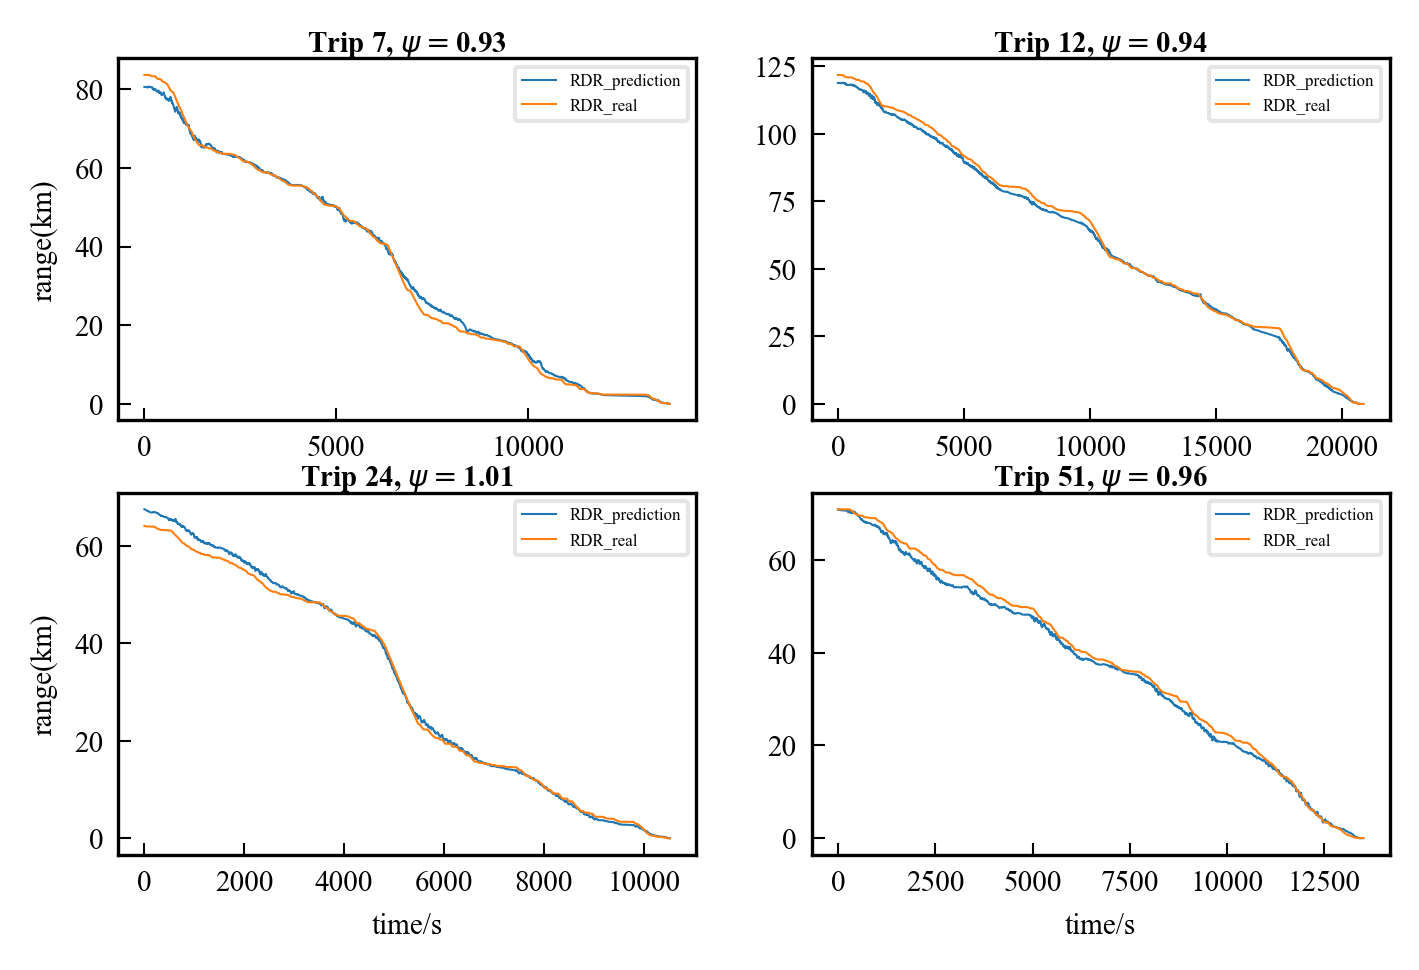

In [68]:
f, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2,figsize=(14/2.56,9/2.56),dpi=300)  # sharey=True 公用一个y轴
# for i in [7,12,24,51]:
    
sample_i,psi=traj_i(i=7)
ax1.plot(sample_i["RDR_mean_consum3_local"],linewidth=0.5)
ax1.plot(sample_i["inverse_distance"],linewidth=0.5)
ax1.legend(["RDR_prediction","RDR_real"],prop = fontP)
# ax1.set_xlabel("time(second)")
ax1.set_ylabel("range(km)")
ax1.set_title(r"Trip {}, $\psi=${:.2f}".format(7,psi),y=0.95,weight='bold')
    
sample_i,psi=traj_i(i=12)
ax2.plot(sample_i["RDR_mean_consum3_local"],linewidth=0.5)
ax2.plot(sample_i["inverse_distance"],linewidth=0.5)
ax2.legend(["RDR_prediction","RDR_real"],prop = fontP)
# ax2.set_xlabel("time(second)")
# ax2.set_ylabel("Range(km)")
ax2.set_title(r"Trip {}, $\psi=${:.2f}".format(12,psi),y=0.95,weight='bold')   

sample_i,psi=traj_i(i=24)
ax3.plot(sample_i["RDR_mean_consum3_local"],linewidth=0.5)
ax3.plot(sample_i["inverse_distance"],linewidth=0.5)
ax3.legend(["RDR_prediction","RDR_real"],prop = fontP)
ax3.set_xlabel("time/s")
ax3.set_ylabel("range(km)")
ax3.set_title(r"Trip {}, $\psi=${:.2f}".format(24,psi),y=0.95,weight='bold')

sample_i,psi=traj_i(i=51)
ax4.plot(sample_i["RDR_mean_consum3_local"],linewidth=0.5)
ax4.plot(sample_i["inverse_distance"],linewidth=0.5)
ax4.legend(["RDR_prediction","RDR_real"],prop = fontP)
ax4.set_xlabel("time/s")

ax4.set_title(r"Trip {}, $\psi=${:.2f}".format(51,psi),y=0.95,weight='bold')

plt.savefig("../处理过程的画图数据/剩余续驶里程对比/4段长里程对比(短).tif")